# CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

Le chapitre 3 traite des variables de réponse à **valeur réelle (problèmes de régression)**.

Ce chapitre traitera des **variables qualitatives (catégorielles) (problèmes de classification)**.

Les problèmes de classification peuvent être considérés comme des problèmes de régression puisque la plupart des modèles renvoient une probabilité d'appartenir à une certaine classe. Étant donné que les probabilités prennent des valeurs réelles, le problème peut également être appelé régression - comme dans la régression logistique - une technique d'apprentissage automatique utilisée pour la classification mais qui renvoie les probabilités sous forme de valeurs réelles.

In [2]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [3]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [4]:
default = pd.read_csv("default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


<Figure size 864x720 with 0 Axes>

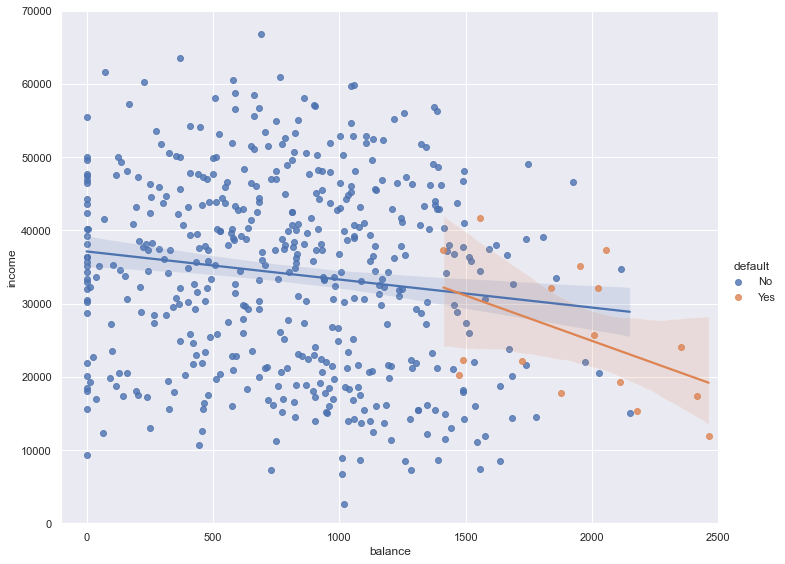

In [15]:
plt.gcf().set_size_inches(12, 10)
sns.lmplot(x= 'balance', y= 'income', data=default.sample(500), hue='default', height=8, aspect=1.28)
plt.ylim([0,70000]);
plt.xlim([-100,2500]);

On voit bien que la regression linéaire pour prédire `default` ne marche pas

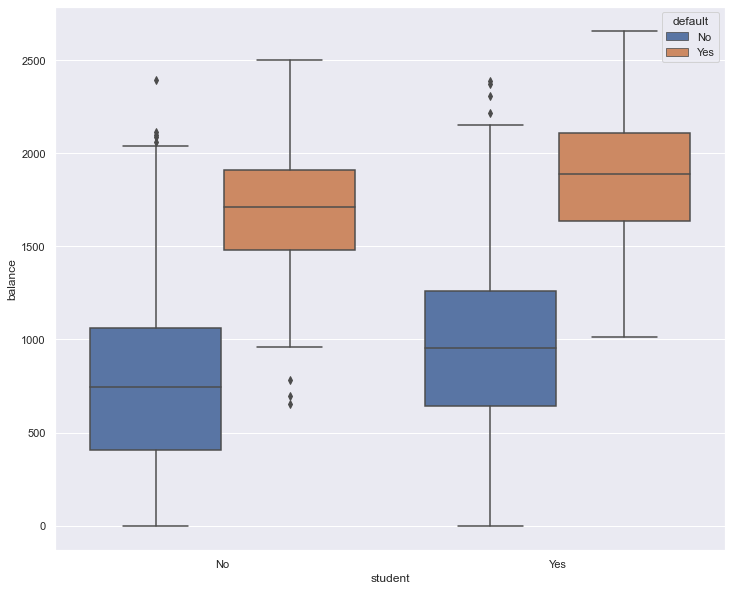

In [16]:
sns.boxplot(x = 'student', y= 'balance', data=default, hue='default');

On peut transformer des categories en valeurs numériques mais on ne peut pas toujours les ordonner(par exemple, `chat` = 0, `chien` = 1, `oiseau` = 2 mais un chat n'est pas inférieur à un chien (0 < 1) et un chien n'est pas inférieur à un oiseau(1 < 2))

Ce n'est que dans un problème à deux catégories que l'ordre aura un sens, mais même dans ce cas, la régression linéaire produira des estimations de probabilité en dehors de **[0, 1]**.
                                                                                                   
Nous avons indiqué que la régression linéaire n'est pas appropriée dans le cas d'une réponse qualitative. Pourquoi pas? Supposons que nous essayons de prédire l'état de santé d'un patient aux urgences sur la base de ses symptômes. Dans cet exemple simplifié, il existe trois diagnostics possibles : `stroke`, `drug overdose` et `epileptic seizure`. Nous pourrions envisager de coder ces valeurs sous la forme d'une variable de **réponse quantitative**, $Y$ , comme suit :


$$
Y = \left\{
    \begin{array}{ll}
        1 & \mbox{si 'stroke'} \\
        2 & \mbox{si 'drug overdose'} \\
        3 & \mbox{si ' epileptic seizure'}
    \end{array}
\right.
$$


En utilisant ce codage, les moindres carrés pourraient être utilisés pour ajuster un modèle de régression linéaire pour prédire $Y$ sur la base d'un ensemble de prédicteurs $X_1$,...,$X_p$. Malheureusement, ce codage implique **un ordre** sur les résultats, plaçant `drug overdose` entre `stroke` et `epileptic seizure`, et insistant sur le fait que **la différence entre `stroke` et `drug overdose` est la même que la différence entre `drug overdose` et `epileptic seizure`**. En pratique, il n'y a aucune raison particulière pour que cela soit le cas. Par exemple, on pourrait choisir un codage tout aussi raisonnable : 


$$
Y = \left\{
    \begin{array}{ll}
        1 & \mbox{si ' epileptic seizure'} \\
        2 & \mbox{si 'stroke'} \\
        3 & \mbox{si 'drug overdose'}
    \end{array}
\right.
$$


ce qui impliquerait **une relation totalement différente entre les trois conditions**. Chacun de ces codages produirait des modèles linéaires fondamentalement différents qui conduiraient finalement à différents ensembles de prédictions sur les observations de test. Si les valeurs de la variable de réponse adoptaient un ordre naturel, tel que léger, modéré et sévère, et que nous estimions que l'écart entre léger et modéré était similaire à l'écart entre modéré et sévère, alors un codage 1, 2, 3 serait raisonnable. Malheureusement, en général, il n'existe aucun moyen naturel de convertir une variable de réponse qualitative à plus de deux niveaux en une réponse quantitative prête pour la régression linéaire. Pour une réponse qualitative binaire (à deux niveaux), la situation est meilleure. Pour un exemple binaire, il n'y a peut-être que deux possibilités pour l'état médical du patient : `stroke` et `drug overdose`. Nous pourrions alors potentiellement utiliser l'approche de la variable fictive pour coder la réponse comme suit :

$$
Y = \left\{
    \begin{array}{ll}
        0 & \mbox{si 'stroke'} \\
        1 & \mbox{si 'drug overdose'}
    \end{array}
\right.
$$

Nous pourrions alors **ajuster une régression linéaire à cette réponse binaire** et prédire `drug overdose`si $Y > 0.5$  et un `stroke` dans le cas contraire. Dans le cas binaire, il n'est pas difficile de montrer que même si nous inversons le codage ci-dessus, la régression linéaire produira les mêmes prédictions finales. Pour une réponse binaire avec un codage **0 / 1** comme ci-dessus, la régression par les moindres carrés n'est pas complètement déraisonnable : on peut montrer que le $X \hat \beta$ obtenu par régression linéaire est en fait une estimation de **Pr(drug overdose|X)** dans cas spécial. Cependant, si nous utilisons la régression linéaire, certaines de nos estimations pourraient être en dehors de l'intervalle **[0, 1]** , ce qui les rend difficiles à interpréter comme des probabilités ! Néanmoins, les prédictions fournissent un ordre et peuvent être interprétées comme des estimations de probabilité brutes. Curieusement, il s'avère que **les classifications que nous obtenons si nous utilisons la régression linéaire pour prédire une réponse binaire seront les mêmes que pour la procédure d'analyse discriminante linéaire (ADL)**.

Pour résumer, il y a au moins **deux raisons de ne pas effectuer de classification à l'aide d'une méthode de régression** : 
- (a) une méthode de régression ne peut pas accepter une réponse qualitative avec plus de deux classes
- (b) une méthode de régression ne fournira pas d'estimations significatives de Pr(Y |X), même avec seulement deux classes. 

Ainsi, il est préférable d'utiliser une méthode de classification réellement adaptée aux valeurs de réponse qualitatives. Dans la section suivante, nous présentons la régression logistique, qui est bien adaptée au cas d'une reponse qualitative binaire                                                    

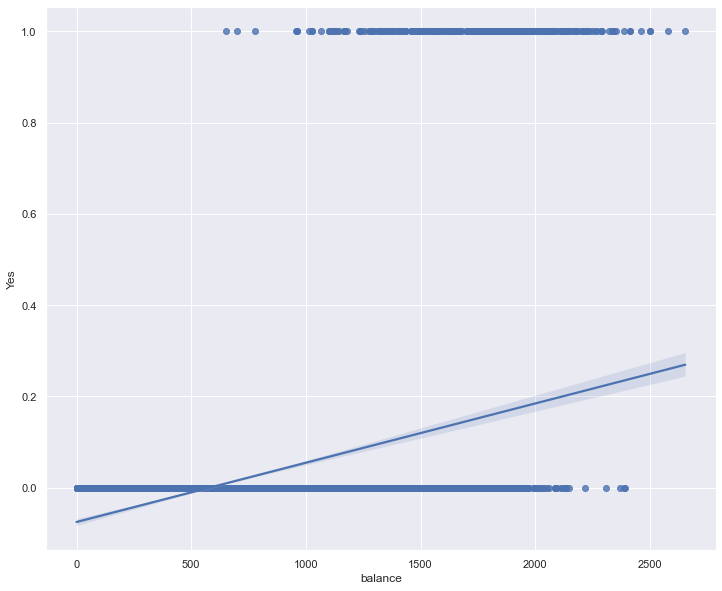

In [17]:
# default['Yes'] = (default['default'] == 'Yes').astype(int)
default['Yes'] = default['default'].apply(lambda x: x =='Yes').astype(int)
sns.regplot(x='balance', y='Yes', data=default);

## Logistic regression

**Logistic function** de **Logistic Regression** est une fonction qui génère toujours un nombre compris entre 0 et 1. De nombreuses fonctions satisfont à cette condition

$$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

**Logit function** est utilisée dans **Logistic Regression** :

$$y = \frac{1}{1 + e^{-t}}$$

avec $t$ le modèle linéaire normal : $t = \beta_0 + \beta_1X$. (les deux équations ci-dessus sont équivalentes)

$y$ peut maintenant être considéré comme **la probabilité étant donné une certaine valeur $X$ puisqu'il sera toujours compris entre 0 et 1** : 

$$ \mbox{log} \left ( {\frac{p(X)}{1 - p(X)}}\right ) = \beta_0 + \beta_1X$$ Où $y$ a été remplacé par $p(X)$ , la probabilité de $X$ et :

$$\mbox{odds} = \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

Ainsi, par exemple, si vous jouez et pensez que Clinton remportera la présidence 80% du temps. `odds` serait de 0,8/0,2 = 4 ou dit `"4 contre 1"`. Pour chaque fois qu'elle gagne, Trump gagnera une fois.

Pour **Logistic Regression**, `log(odds)` sont modélisées par un modèle linéaire qui peut être résolu par **Linear Regression**. Etant donné une augmentation d'une unité de l'une des variables (disons $X_1$ ), $\beta_1$ augmentera de 1 `log-odds`. Ce qui veut dire que les chances seront multipliées par $e^\beta_1$.

Dans notre exemple d'élection, $X_1$ pourrait être le pourcentage d'électeurs de moins de 30 ans et $\beta_1$ pourrait être 0.5. Cela voudrait dire si $X_1$ devaient **augmenter de 1%**, `log(odds)` de Clinton **augmenteraient de 0,5%**. Dans notre exemple ci-dessus, `log(odds)` de Clinton passeraient de 4 à 4,5 et sa probabilité de gagner passerait de 80 % à 4,5 / 5,5 ou 82 %

Il n'y a pas de relation linéaire entre la probabilité d'être dans une certaine classe et $X$ dans la régression logistique en raison de **la nécessité d'avoir des probabilités entre 0 et 1**

## Estimation des coefficients avec Maximum Likelihood

En régression linéaire, les coefficients du modèle ont été trouvés en minimisant les carrés des résidus. Dans la régression logistique, nous maximisons les probabilités de tous les points par une méthode appelée **Maximum Likelihood**.

**Maximum Likelihood** (ou le maximum de vraisemblance) **multiplie la probabilité du modèle pour chaque observation et choisit les paramètres qui maximisent ce nombre**.

**Log Likelihood** (ou la vraisemblance logarithmique) est en fait utilisée car la multiplication des probabilités donnent un resultat se rapprochant de plus en plus près de 0, ce qui entraine un **numerical underflow problem**, qui est qu'un ordinateur ne peut plus calculer un nombre avec trop de zeros après une virgule(ce qui arrive pour la plupart des problèmes avec une quantité non triviale de données)

Pour remédier à ce problème, **Log Likelihood** fait **la somme des probabilités** et non leur produit, ce qui engendre un resultat différent de 0

**Likelihood function** :
    
$$L(\beta_0, \beta_1) = \prod_{y_i = 1} p(x_i) \prod_{y_i = 0}(1 - p(x_i))$$

$$\hat p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1X}}{1 + e^{\hat \beta_0 + \hat \beta_1X}}$$

In [18]:
results = smf.logit('Yes ~ balance', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.4534
Time:                        18:17:14   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

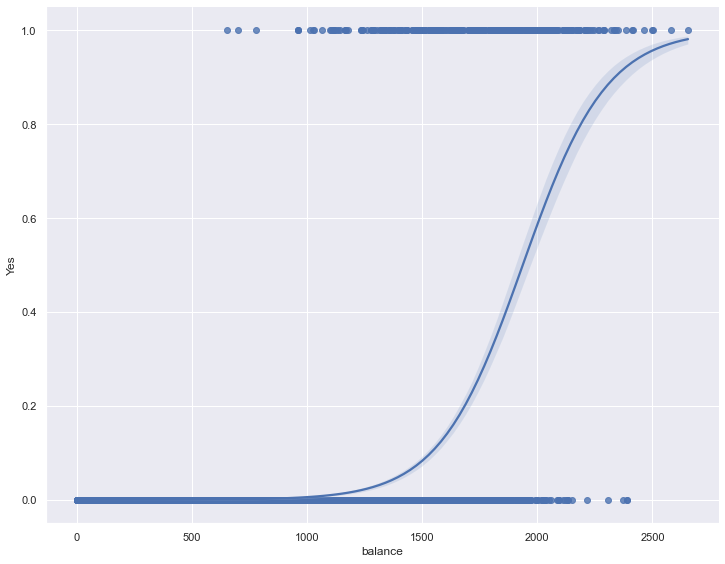

In [19]:
sns.lmplot(x='balance', y='Yes', data=default, logistic=True, height=8, aspect=1.28)

In [20]:
results.params

Intercept   -10.651331
balance       0.005499
dtype: float64

Pour chaque augmentation de **1$** de `balance`, **log(odds)** augmente de 0.005499

**log(odds)** = -10.651331 quand `balance` = 0

$$\mbox{odds} = \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

$$\mbox{log(odds)} = \beta_0 + \beta_1X$$

si $X = 0$ alors $\mbox{odds} = e^{\beta_0}$ avec $\beta_0 = -10.651331$

In [21]:
odds = np.exp(-10.651331)
odds

2.3669316762017546e-05

si : 
    
$$\mbox{odds} = \frac{p(X)}{1 - p(X)}$$

alors :
    
$$\frac {1} {\mbox{odds}} = \frac{1 - p(X)}{p(X)}$$   

In [54]:
one_on_odds = 1 / odds

$$\frac{1 - p(X)}{p(X)} + 1 = \frac{1 - p(X)}{p(X)} + \frac{p}{p} = \frac{1 - p(X) + p(X)}{p(X)} = \frac{1}{p(X)}$$

donc :
    
$$\frac {1} {\mbox{odds}} + 1 = \frac{1}{p(X)}$$

In [55]:
one_on_p = one_on_odds + 1

si $p$ est **proche de 0**, alors $\frac{p(X)}{1 - p(X)} = p(X)$

In [56]:
1 / one_on_p

2.3668756538721668e-05

### Sklearn.linear_model.LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
X = np.column_stack((np.ones(len(default)), default['balance']))
X

array([[1.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [1.00000000e+00, 1.07354916e+03],
       ...,
       [1.00000000e+00, 8.45411989e+02],
       [1.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

Attention à la concatenation des colonnes !!!</br>
voici les différences entre **`np.vstack`, `np.hstack`, `np.column_stack`**

In [25]:
a = [0, 1, 2]
b = [3, 4, 5]

In [26]:
np.vstack((a, b))

array([[0, 1, 2],
       [3, 4, 5]])

In [27]:
np.hstack((a, b))

array([0, 1, 2, 3, 4, 5])

In [28]:
np.column_stack((a, b))

array([[0, 3],
       [1, 4],
       [2, 5]])

In [29]:
model.fit(X, default['Yes'])

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [30]:
# coefficients
model.coef_

array([[-4.99233917,  0.00509773]])

In [31]:
model.predict_proba(X)

array([[9.98103317e-01, 1.89668268e-03],
       [9.97037972e-01, 2.96202838e-03],
       [9.89142864e-01, 1.08571355e-02],
       ...,
       [9.96581052e-01, 3.41894785e-03],
       [8.79350753e-01, 1.20649247e-01],
       [9.99871626e-01, 1.28374344e-04]])

In [78]:
# predire 'default' pour balance de 1000$ 
# 99.3% de chance que 'default' = 'Yes'
#  0.7% de chance que 'default' = 'No'
model.predict_proba([[1, 1000]])

array([[0.99251209, 0.00748791]])

In [82]:
# predire 'default' pour balance de 1500$ 
#  91% de chance que 'default' = 'Yes'
#   8% de chance que 'default' = 'No'
model.predict_proba([[1, 1500]])

array([[0.91198255, 0.08801745]])

In [81]:
# predire 'default' pour balance de 2000$ 
#  44.5% de chance que 'default' = 'Yes'
#  55.5% de chance que 'default' = 'No'
model.predict_proba([[1, 2000]])

array([[0.4474996, 0.5525004]])

In [84]:
# predire 'default' pour balance de 2500$ 
#  0.5% de chance que 'default' = 'Yes'
# 94.5% de chance que 'default' = 'No'
model.predict_proba([[1, 2500]])

array([[0.05954437, 0.94045563]])

In [83]:
# predire 'default' pour balance de 3000$ 
#  0.5% de chance que 'default' = 'Yes'
# 99.5% de chance que 'default' = 'No'
model.predict_proba([[1, 3000]])

array([[0.00492494, 0.99507506]])

### Multiple Linear Regression

In [32]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.4619
Time:                        18:18:34   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Ce premier modèle **`balance + student`** montre une **relation négative entre `student` et `default`** : ce qui signifie qu'**être étudiant diminue la probabilité de `default == Yes`**

un **z-score** est le **nombre d’écarts types par rapport à la moyenne d’un point d’information**. Quoi qu’il en soit, il s’agit en fait d’une proportion du nombre d’écarts-types en dessous ou au-dessus de la population que représente un score brut.

### Simpsons paradox

In [34]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                0.004097
Time:                        18:21:34   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

Le deuxième modèle montre le contraire, à savoir qu'**être étudiant augmente les risques de `default = Yes`**. Cela peut s'expliquer par le fait que **les étudiants ont en moyenne plus de dettes**, mais comparés à ceux qui ont le même montant de dettes, ils sont moins susceptibles de faire `default`.

## Multiclass Logistic Regression

### One vs All

Une méthode simple lorsque vous avez **k classes** où **k > 2** consiste à créer **k-1 classificateurs de régression logistique indépendants** en choisissant **la variable de réponse binaire**, 1 dans la classe actuelle sinon 0.

### Linear Discriminant Analysis

À ne pas confondre avec l'allocation `dirichlet latente` Utilisé pour les problèmes de classification multiclasses.</br>
https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente#:~:text=Dans%20le%20domaine%20du%20traitement,par%20des%20similarit%C3%A9s%20de%20donn%C3%A9es.</br>
https://fr.wikipedia.org/wiki/Analyse_discriminante_lin%C3%A9aire

**LDA** suppose que **toutes les variables prédictives proviennent d'une distribution gaussienne et estime la moyenne et la variance pour chaque variable prédictive où la variance est la même pour chaque variable prédictive**. Il estime également **une probabilité a priori simplement en utilisant la proportion de classes dans l'ensemble d'apprentissage**.

La **règle de Bayes** est utilisée pour **calculer une probabilité pour chaque classe**. Lorsqu'il y a **plus d'un prédicteur**, une **gaussienne multivariée** est utilisée. Les **corrélations entre chaque prédicteur** doivent **être estimées** (**la matrice de covariance**) car elles sont **un paramètre de la gaussienne multivariée**.

## Stock market prediciton lab

In [13]:
smarket = pd.read_csv('smarket.csv').iloc[:, 1:]
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [14]:
#smarket['Up'] = smarket['Direction'].apply(lambda x: 1 if x=='Up' else 0)
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [15]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [16]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [17]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [18]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                0.001651
Time:                        08:23:49   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [19]:
from sklearn.metrics import confusion_matrix

In [22]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                        penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                        verbose=0, warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

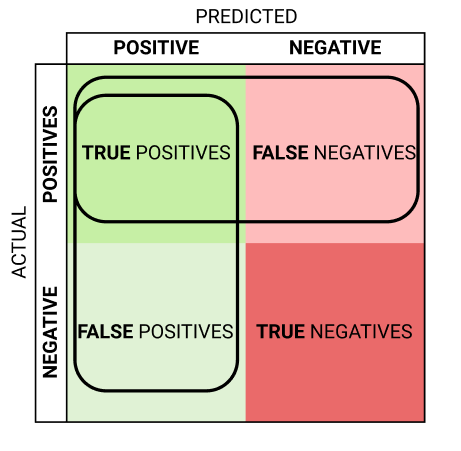

In [23]:
#          Predicted    Predicted
#            False         True
# False  [    TN     ,     FP    ]
# True   [    FN     ,     TP    ]

confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 31, 110]], dtype=int64)

In [25]:
len(y_test)

252

In [103]:
# Total classified  ==>           37 + 74 + 31 + 110 = 252

# well classified   ==>   (Predicted True / True) = 110 , (Predicted False / False) = 37

#   misclassified   ==>   (Predicted True / False) = 74, (Predicted False / True) = 31

well_classified = (37 + 110) / len(y_test)
mis_classified = (74 + 31) / len(y_test)

print('good classification:', round(well_classified,2))
print('bad classification :', round(mis_classified, 2))

good classification: 0.58
bad classification : 0.42


**`True Positive`**  (**`TP`**)  ==> (**`Predicted True`** / **`True`**)</br>
**`True Negative`**  (**`TN`**)  ==> (**`Predicted False`** / **`False`**)</br>
**`False Negative`** (**`FN`**)  ==> (**`Predicted False`** / **`True`**)</br>
**`False Positive`** (**`FP`**)  ==> (**`Predicted True`** / **`False`**)

### Accuracy

In [106]:
TP, TN, FN, FP = 110, 37, 31, 74

$$\mbox{Accuracy} = \frac{\mbox{Correct}}{\mbox{Correct + Incorrect}} = \frac{\mbox{Correct}}{\mbox{Total}} = \frac{\mbox{TP} + \mbox{TN}}{\mbox{TP} + \mbox{TN} + \mbox{FP} + \mbox{FN}}$$

In [107]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
round(accuracy, 2)

0.58

Sur le **total des 252 prédictions**, seulement **147 sont bonnes** :

**`110 predictions True`**</br>
**`37 predictions False`**

ce qui fait un **score de `58%`**

### Precision

$$\mbox{Precision} = \frac{\mbox{True Positive}}{\mbox{All Predicted True}} = \frac{\mbox{TP}}{\mbox{TP + FP}}$$

La **`Precision`** est **la proportion des items pertinents parmi l'ensemble des items proposés**

In [108]:
precision = TP / (TP + FP)
round(precision, 2)

0.6

Sur le **total des 184 predictions `True`**, seulement **110 sont justes** :

**`110` bonnes predictions `True` `(Predicted True / True)`**</br>
**`74` mauvaises predictions `True` `(Predicted True / False)`**

### Recall ou Sensibility

$$\mbox{Recall} = \mbox{Sensibility} = \frac{\mbox{True Positive}}{\mbox{All Real True}} = \frac{\mbox{TP}}{\mbox{TP + FN}}$$

Le **`Recall`** est **taux de vrais positifs** fait référence à **la probabilité d'un test positif, à condition d'être vraiment positif**,cad **la proportion des items pertinents proposés parmi l'ensemble des items pertinents**

In [109]:
recall = TP / (TP + FN)
round(recall, 2)

0.78

Sur un **total de 141 Real `True`**, seulement **`110`** ont été **prédite `True`**:
    
**`110` bonnes predictions `True` `(Predicted True / True)`**</br>
**`31` mauvaises predictions `False` `(Predicted False / True)`**

### Specificity

$$\mbox{Specificity} = \frac{\mbox{True Negative}}{\mbox{All Real False}} = \frac{\mbox{TN}}{\mbox{TN + FP}}$$

La **`Specificity`** est le **taux de vrais négatifs** fait référence à **la probabilité d'un test négatif, à condition qu'il soit vraiment négatif**.

In [110]:
specificity = TN / (TN + FP)
round(specificity, 2)

0.33

Sur un **total de 111 Real `False`**, seulement **`37`** ont été **prédite `False`**:
    
**`37` bonnes predictions `False` `(Predicted False / False)`**</br>
**`74` mauvaises predictions `True` `(Predicted True / False)`**

### PNV : Predictive Negative Value

$$\mbox{PNV} = \frac{\mbox{True Negative}}{\mbox{All Predicted False}} = \frac{\mbox{TN}}{\mbox{TN + FN}}$$

**`PNV`** ou **`Predicted Negative Value`** (`valeur prédictive négative`) est **la proportion des resultats negatifs**

In [140]:
pnv = TN / (TN + FN)
round(pnv, 2)

0.54

Sur un **total de 68 predictions `False`**, seulement **`37`** sont **justes**:
    
**`37` bonnes predictions `False` qui sont  `False` `(Predicted False / False)`**</br>
**`31` mauvaises predictions `True` `(Predicted True / False)`**

In [117]:
print(f"Accuracy               : {round(accuracy*100, 2)}%")
print(f"Acc Predicted True     : {round(precision*100, 2)}%")
print(f"Acc Predicted False    : {round(pnv*100, 2)}%")
print(f"Taux Vrai Positifs     : {round(recall*100, 2)}%")
print(f"Taux Vrai Negatifs     : {round(specificity*100, 2)}%")

Accuracy               : 58.33%
Acc Predicted True     : 59.78%
Acc Predicted False    : 54.41%
Taux Vrai Positifs     : 78.01%
Taux Vrai Negatifs     : 33.33%


In [126]:
all_true_y_test = np.sum(y_test[y_test == 1])
all_false_y_test = len(y_test) - np.sum(y_test[y_test == 1])

all_true_y_pred = np.sum(y_pred[y_pred == 1])
all_false_y_pred = len(y_pred) - np.sum(y_pred[y_pred == 1])

print(f"All real values == 'True'        : {all_true_y_test}")
print(f"All real values == 'False'       : {all_false_y_test}")
print(f"All predicted values == 'True'   : {all_true_y_pred}")
print(f"All predicted values == 'False'  : {all_false_y_pred}")

confusion_matrix(y_test, lr.predict(X_test))

All real values == 'True'        : 141
All real values == 'False'       : 111
All predicted values == 'True'   : 184
All predicted values == 'False'  : 68


array([[ 37,  74],
       [ 31, 110]], dtype=int64)

In [72]:
y_pred = lr.predict(X_test)

In [143]:
# Taux de predictions 'True' par rapport aux vrai valeurs 'True' : Tous les predicted 'True' / touts les vrai 'True'
# pred_true = (FP + TP) / (FN + TP) = (74 + 110) / (31 + 110) = 184 / 141 = 1.304

pred_true = all_true_y_pred / all_true_y_test
pred_true

1.3049645390070923

Il y a **`130%` de predictions `True`** par rapport aux **vrai valeurs `True`**

In [152]:
# Recall (taux de vrais positifs) : les predictions 'True' qui sont vraiment 'True' / toutes les vrai 'True'
# TP / (TP + FN) = 110 / (110 + 31) = 110 / 141 = 0.78
print(sum(y_pred[y_test == 1]) / len(y_pred[y_test == 1]))
print(f"y_pred_true = y_true  : {int((110/141)*100)}%")
print(f"y_pred_true = y_false : {int((31/141)*100)+1}%")

0.7801418439716312
y_pred_true = y_true  : 78%
y_pred_true = y_false : 22%


Il y a **`78%` de predictions `True`** qui sont **vraiment `True`** par rapport à **toutes les valeurs `True`**</br>
Il y a **`22%` de predictions `True`** qui sont en réalité des **valeurs`False`** cad des **Faux Negatifs**

In [153]:
# Taux de predictions 'False' par rapport aux vrai valeurs 'False' :  Tous les predicted 'False' / touts les vrai 'False'
# pred_false = (TN + FN) / (TN + FP) = (37 + 31) / (37 + 74) = 68 / 111 = 0.666

pred_false = all_false_y_pred / all_false_y_test
pred_false

0.6126126126126126

Il y a **`61%` de predictions `False`** par rapport aux **vrai valeurs `False`**

In [156]:
# Taux de vrais negatifs : les predictions 'False' qui sont vraiment 'False' / toutes les vrai 'False'
# TN / (TN + FP) = 37 / (37 + 74) = 37 / 111 = 0.33

print(f"y_pred_false = y_false  : {int((37/111)*100)}%")
print(f"y_pred_false = y_true : {int((74/111)*100)+1}%")

y_pred_false = y_false  : 33%
y_pred_false = y_true : 67%


Il y a **`33%` de predictions `False`** qui sont **vraiment `False`** par rapport à **toutes les valeurs `False`**</br>
Il y a **`67%` de predictions `False`** qui sont en réalité des **valeurs`True`** cad des **Faux Positifs**

### Linear Discriminant Analysis and Quadratic Discriminant Analysis

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [159]:
lda = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                                solver='svd', store_covariance=False, tol=0.0001)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [160]:
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

la **matrice de confusion** est **à peu près identique** à celle de **Logistic Regression** : il y a une valeur supplémentaire bien classée en `True`

In [161]:
# probabilité des 2 classes priors (a priori) : p(y) et p(ɏ)
lda.priors_

array([0.49198397, 0.50801603])

### Bayes

$$ P(A\space|\space B) = \frac{P(A\space \cap \space B)}{P(B)}$$

$$ P(A\space|\space B) = \frac{P(B\space |\space A) \space P(A)}{P(B)}$$


$$ P(y\space|\space X) = \frac{P(y\space \cap \space X)}{P(X)}$$

$$ P(y\space|\space X) = \frac{P(X\space |\space y) \space P(y)}{P(X)}$$

$$ P(y\space|\space X) = P(y) \space \frac{P(X\space |\space y)}{P(X)}$$

$$ \mbox{posterior} = \mbox{prior} \space \frac{\mbox{Likelihood}}{\mbox{marginal}}$$


https://www.freecodecamp.org/news/bayes-rule-explained/</br>
https://www.analyticsvidhya.com/blog/2021/05/an-intuitive-introduction-to-bayesian-decision-theory/</br>
https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/

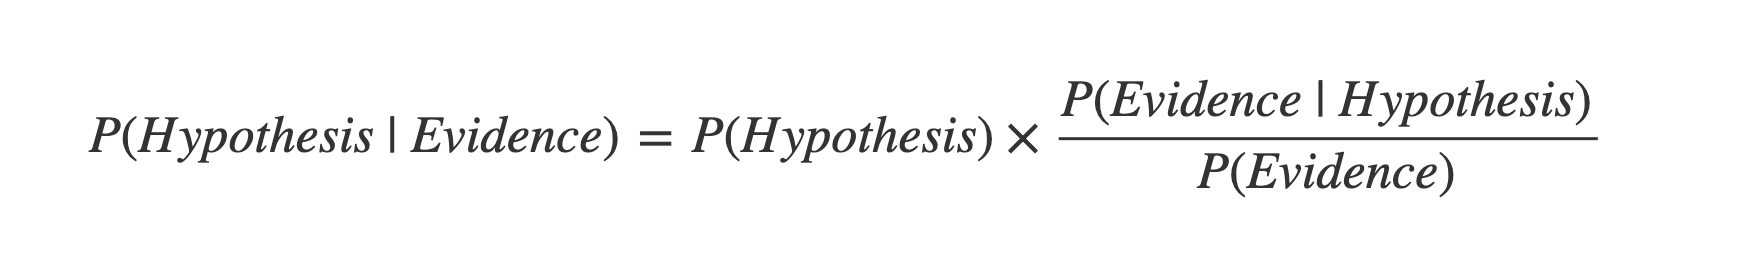

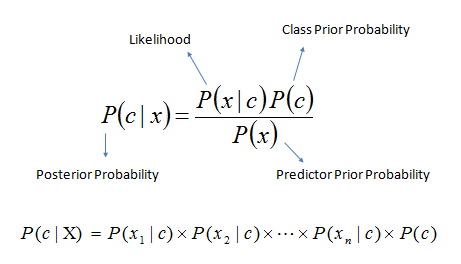

exemple :
    
$$ \mbox{P(Queen | Diamond)} = \frac{\mbox{P(Diamond | Queen)} \space \mbox{P(Queen)}}{\mbox{P(Diamond)}} $$

$$ \mbox{P(Queen | Diamond)} = \frac{\mbox{P(Diamond | Queen)} }{\mbox{P(Diamond)}} \space \mbox{P(Queen)}$$



$$\mbox{P(Diamond)} = \frac{13}{52} = \frac{1}{4}$$

$$\mbox{P(Queen)} = \frac{4}{52} = \frac{1}{13}$$

$$ \mbox{P(Diamond | Queen)} = \frac{\mbox{P(Diamond} \cap \mbox{Queen)}}{P(Queen)} = \frac{1 / 52}{1 / 13} = \frac{13}{52} = \frac{1}{4}$$

donc:

$$\mbox{P(Queen | Diamond)} = \frac{1/4 \space \mbox{x} \space 1/13}{1/4} = \frac{1}{13}$$



In [166]:
qda = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                   store_covariance=False, tol=0.0001)

# on étudie seulement : Lag1 + Lag2 
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis()

In [170]:
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [171]:
#      [[ 37,  74],
#       [ 31, 110]]       Pour Logistic Regression

 On voit que **Quadratic Discriminant Analysis** prédit mieux les cas `positifs` (**+11**) mais moins bien les cas `negatifs`(**-7**)

### KNearestNeighbors

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
# neighbors = 3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                        weights='uniform')

In [175]:
knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[48, 63],
       [55, 86]], dtype=int64)

**KNN** repartie mieux les **erreurs de prédictions**

In [176]:
# neighbors = 5
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                        weights='uniform')

knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[40, 71],
       [59, 82]], dtype=int64)

In [177]:
# neighbors = 10
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=10, p=2,
                        weights='uniform')

knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[67, 44],
       [77, 64]], dtype=int64)

## Exercices

### Exercice 1

En utilisant un peu d'algèbre, montrez que (4.2) est équivalent à (4.3). En d'autres termes, la représentation de la fonction logistique et la représentation logit pour le modèle de régression logistique sont équivalentes

$$4.2$$

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$4.3$$

$$\frac {p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$

#### solution

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) = 1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) =  \frac{1 - e^{\beta_0 + \beta_1 X} + e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) =  \frac{1}{1 + e^{\beta_0 + \beta_1 X}}$$

on inverse l'equation :

$$ \frac{1}{1 - p(X)} =  1 + e^{\beta_0 + \beta_1 X}$$

on multiplie de chaque coté par $p(X)$

$$ p(X) \left ( \frac{1}{1 - p(X)}\right ) =  p(X) \left ( 1 + e^{\beta_0 + \beta_1 X} \right )$$

or :

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

ce qui donne:

$$  \frac{p(X)}{1 - p(X)} = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \left ( 1 + e^{\beta_0 + \beta_1 X} \right )$$

$$  \frac{p(X)}{1 - p(X)} = \frac{e^{\beta_0 + \beta_1 X}(1 + e^{\beta_0 + \beta_1 X})}{1 + e^{\beta_0 + \beta_1 X}} $$

$$  \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$

on prend le log:

$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \mbox{log} \left (e^{\beta_0 + \beta_1 X}\right )$$

or, $ \mbox{log} (e^x) = x$ donc:

$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \beta_0 + \beta_1 X$$

### Exercice 2

Il a été indiqué dans le texte que classer une observation dans la classe pour laquelle (4.17) est la plus grande équivaut à classer une observation dans la classe pour laquelle (4.18) est la plus grande. Prouver que c'est le cas. En d'autres termes, sous l'hypothèse que les observations de la classe k sont tirées d'une distribution $N(\mu_k, \sigma^2)$, le classifieur de Bayes attribue une observation à la classe pour laquelle la fonction discriminante est maximisée

$$4.16$$

$$ f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k}\mbox{exp} \left ( -\frac{1}{2 \sigma_k^2}(x - \mu_k)^2 \right )$$

$$4.17$$

#### $$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$4.18$$

$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \mbox{log}(\pi_k)$$

Par exemple, si $K = 2$ et $\pi_1 = \pi_2$, alors le classifieur de Bayes affecte une observation à la classe $1$ si $2x(\mu_1 − \mu_2) > \mu_1^2 − \mu_2^2$, et à la classe $2$ sinon. La frontière de décision de Bayes est le point pour lequel $\delta_1(x) = \delta_2(x)$ ; on peut montrer que cela revient à :
    
$$x = \frac{\mu_1^2 − \mu_2^2}{2(\mu_1 − \mu_2)} = \mu_1 + \mu_2$$

#### solution

Comme log est une fonction croissante monotone, la maximisation du log d'une fonction maximisera également la fonction d'origine. Après avoir pris le log de 4.12, toutes les constantes peuvent être supprimées et vous vous retrouvez avec la 4.13

$$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ p_k(x) = \frac{\frac{1}{\sqrt{2 \pi}\sigma} \pi_k \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\frac{1}{\sqrt{2 \pi}\sigma} \sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

on simplifie $\frac{1}{\sqrt{2 \pi}\sigma}$ :

$$ p_k(x) = \frac{\pi_k \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

la fonction $\mbox{argmax} p_k(x)$ donne $K$ comme sortie pour $p_k(x)$ max:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left ( \frac{\pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )}{\sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )} \right )$$

comme pour chaque $K$, le denominateur est le même, on peut faire les calculs que pour le numérateur:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left ( \pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) \right )$$

si $f(x)$ est maximum en $x_0$, alors $\mbox{log}(f(x))$ l'est aussi:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}\left ( \pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

or $\mbox{log}(ab) = \mbox{log}(a) + \mbox{log}(b)$ :

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) + \mbox{log} \left ( \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

or, $ \mbox{log} (e^x) = x$ donc:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)  -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) $$

on developpe $(x - \mu_K)^2$:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)  -\frac{1}{2 \sigma^2}(x^2 - 2x\mu_K + \mu_K^2) \right ) $$

of $x^2$ n'est pas pris en consideration pour argmax:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)   -\frac{2x\mu_K}{2 \sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right ) $$

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)   -x\frac{\mu_K}{\sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right ) $$

$$ \mbox{argmax}_K (p_k(x)) =  \mbox{argmax}_K (\delta(x)) $$

### Exercice 3

Ce problème concerne le modèle **QDA**, dans lequel les observations au sein de chaque classe sont tirées d'une distribution normale avec un vecteur moyen spécifique à la classe et une matrice de covariance spécifique à la classe. Considérons le cas simple où $p = 1$ ; c'est-à-dire qu'il n'y a qu'une seule fonctionnalité. Supposons que nous ayons $K$ classes, et que si une observation appartient à la ke classe alors $X$ provient d'une distribution normale unidimensionnelle, $X ∼ N(\mu_k, \sigma_k^2)$.

Rappelons que la fonction de densité pour la distribution normale unidimensionnelle est donnée en (4.16). Montrer que dans ce cas, le classificateur de Bayes n'est pas linéaire. Argumenter qu'il est en fait quadratique. Indice : Pour ce problème, vous devez suivre les arguments exposés à la section 4.4.1, mais sans faire l'hypothèse que $\sigma_1^2 = ... = \sigma_K^2$.

$$\mbox{BAYES Theorem}$$

$$P(Y = k \space | \space X = x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$p_k(x) = P(Y = k \space | \space X = x)$ est la probabilité **a posteriori** qu'une observation a posteriori $X = x$ appartienne à la $k_{eme}$ classe. C'est-à-dire qu'il s'agit de la probabilité que l'observation appartienne à la $k_{eme}$ classe, **compte tenu** de la valeur du prédicteur pour cette observation

$f_k(x)$ est **Normal** ou **Gaussian**

#### solution

$$ f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k}\mbox{exp} \left ( -\frac{1}{2 \sigma_k^2}(x - \mu_k)^2 \right )$$

$$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

En supprimant l'hypothèse de termes de variance partagée sur toutes les classes $K$, les termes de (4.12) qui ne varient pas avec $k$ :

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\pi_K \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) \right )$$

on prend le log:

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}\left (\pi_K \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) - \mbox{log} (\sqrt{2 \pi}\sigma) -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) - \mbox{log} (\sqrt{2 \pi}\sigma) -\frac{x^2}{2 \sigma^2} -\frac{2x\mu_K}{2 \sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (x^2 \left (-\frac{1}{2 \sigma^2} \right ) -\frac{\mu_K^2}{2 \sigma^2} -\frac{2x\mu_K}{2 \sigma^2} + \mbox{log}(\pi_K) + \mbox{log} (\sqrt{2 \pi}\sigma)    \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K(\delta(x^2))$$

Comme le montre la présence de $x^2$ dans le terme final, le discriminant n'est pas linéaire mais quadratique

### Exercice 4

Lorsque le nombre de caractéristiques $p$ est grand, il y a une détérioration des performances de **KNN** et d'autres approches locales qui effectuent une prédiction en utilisant uniquement des observations proches de l'observation de test pour laquelle une prédiction doit être faite. Ce phénomène est connu sous le nom de **malédiction de la dimensionnalité**, et il est lié au fait que les approches non paramétriques fonctionnent souvent mal lorsque p est grand. Nous allons maintenant enquêter sur cette malédiction

(a) Supposons que nous ayons un ensemble d'observations, chacune avec des mesures avec $p = 1$ feature, $X$. Nous supposons que $X$ est **distribué uniformément** (équitablement) sur $[0, 1]$. Une valeur de réponse est associée à chaque observation. Supposons que nous souhaitions prédire la réponse d'une observation de test en utilisant uniquement les observations situées **à moins de 10 %** de la plage de $X$ la plus proche de cette observation de test. Par exemple, afin de prédire la réponse pour une observation de test avec $X = 0.6$, nous utiliserons des observations dans la plage $[0,55, 0,65]$. En moyenne, quelle fraction des observations disponibles allons-nous utiliser pour faire la prédiction ?

**reponse**:

Dans une distribution uniforme, tous les intervalles de même longueur sont équitablement probables. En supposant $x ∈ [0.05, 0.95]$, alors : $[x − 0.05, x + 0.05]$, donc la fraction d'observation des KNN est de $10^{-1}$ cad **𝑙𝑒𝑛𝑔𝑡ℎ = 0.1**. En moyenne **10% des observations** seraient disponibles pour faire une prédiction pour l'observation du test

(b) Supposons maintenant que nous ayons un ensemble d'observations, chacune avec des mesures sur $p = 2$ caractéristiques, $X1$ et $X2$. Nous supposons que $(X1, X2)$ sont uniformément distribués sur $[0, 1]$ × $[0, 1]$. Nous souhaitons prédire la réponse d'une observation de test en utilisant uniquement les observations qui se situent **à moins de 10 %** de la plage de $X1$ et **à moins de 10 %** de la plage de $X2$ **les plus proches de cette observation de test**. Par exemple, afin de prédire la réponse pour une observation de test avec $X1 = 0.6$ et $X2 = 0.35$, nous utiliserons des observations dans la plage $[0,55, 0,65]$ pour $X1$ et dans la plage $[0.3, 0.4]$ pour $X2$. En moyenne, quelle fraction des observations disponibles allons-nous utiliser pour faire la prédiction ?

**reponse**:
    
En supposant que $x ∈ [0.05, 0.95]$, $x1_{lenght} × \space x2_{lenght}= 0.1 × \space 0.1 = 10^{-2} = 0.01$. Par conséquent, **1 % des observations disponibles** seraient utilisées pour faire une prédiction.

(c) Supposons maintenant que nous ayons un ensemble d'observations sur $p = 100$ caractéristiques. Encore une fois, les observations sont **uniformément réparties** sur chaque caractéristique, et encore une fois **chaque caractéristique varie en valeur de 0 à 1**. Nous souhaitons prédire la réponse d'une observation de test en utilisant des observations dans les **10 % de la plage de chaque caractéristique** qui sont **les plus proches de cette observation de test**. Quelle fraction des observations disponibles allons-nous utiliser pour faire la prédiction ?

**reponse**:
    
Lorsque $p = 100$ alors $0.1^p × 100 = 0.1^{100} × \space 100$ des observations sont disponibles.

la fraction des nearest neighbors est $10^{-p}$

(d) À l'aide de vos réponses aux parties (a) à (c), soutenez qu'**un inconvénient de KNN lorsque p est grand** est qu'il y a **très peu d'observations d'entraînement "à proximité" d'une observation de test donnée**.

À mesure que le nombre de prédicteurs augmente, la fraction d'observations disponibles pour faire une prédiction est réduite de façon exponentielle : $10^{-p}$ pour $p$ predicteurs

(e) Supposons maintenant que nous souhaitions faire une prédiction pour une observation de test en créant **un hypercube** de dimension $p$ centré autour de l'observation de test qui contient, en moyenne, **10 % des observations d'apprentissage**. Pour $p = 1$, $2$ et $100$, quelle est la longueur de chaque côté de l'hypercube ? Commentez votre réponse.

Remarque : Un hypercube est une généralisation d'un cube à un nombre arbitraire de dimensions. Quand $p = 1$, un hypercube est simplement **un segment de droite**, quand $p = 2$ c'est **un carré**, et quand $p = 100$ c'est **un cube à 100 dimensions**.

**reponse**:
    
si $p = 1$, alors **𝑙𝑒𝑛𝑔𝑡ℎ $= 0.1^{1/1} = 0.1$** car il n'y a qu'un coté</br>
si $p = 2$, alors **𝑙𝑒𝑛𝑔𝑡ℎ $= 0.1^{1/2} = 0.32$** car il n'y a 2 cotés</br>
si $p = 100$, alors **𝑙𝑒𝑛𝑔𝑡ℎ $= 0.1^{1/100} = 0.977$** car il n'y a 100 cotés</br>

En généralisant, on obtient : pour $p$ features on a **𝑙𝑒𝑛𝑔𝑡ℎ $= 0.1^{1/p}$**

Lorsque p augmente, la longueur du côté converge vers 1, ce qui montre que l'hypercube centré autour de l'observation de test avec 10 % de l'observation de test doit avoir à peu près la même taille que l'hypercube avec toutes les observations. Cela montre également que les observations sont « plus éloignées » d'une observation de test lorsque p augmente ; c'est-à-dire qu'ils sont concentrés près de la limite de l'hypercube

### Exercice 5

Nous examinons maintenant les différences entre **LDA** et **QDA**.

(a) Si la frontière de décision de Bayes est **linéaire**, s'attend-on à ce que **LDA** ou **QDA** fonctionnent mieux sur l'ensemble d'apprentissage ? Sur le banc d'essai ? 

**reponse**:
    
**LDA** est meilleur sur le **testset** car il aura moins de variance qu'un modèle plus complexe mais sera moins performant sur le **trainset** car il ne pourra pas bien s'adapter aux données.

**QDA** est meilleur sur le **trainset** (meilleure fléxibilité pour s'ajuster aux données) mais il performe moins sur le **testset** car sa variance augmente.

(b) Si la frontière de décision de Bayes **n'est pas linéaire**, s'attend-on à ce que **LDA** ou **QDA** fonctionnent mieux sur l'ensemble d'apprentissage ? Sur le banc d'essai ? 

**reponse**:
    
**QDA** sera meilleur autant sur le **trainset** que sur le **testset** car sa compléxité lui permettra de bien s'adapter aux données et il aura moins de variance si les relations entre les données ne sont pas linéaires

(c) En général, à mesure que la taille de l'échantillon n augmente, nous attendons-nous à ce que la précision de la prédiction du test de **QDA** par rapport à **LDA** s'améliore, diminue ou reste inchangée ? Pourquoi? 

**reponse**:

https://thatdatatho.com/linear-vs-quadratic-discriminant-analysis/

Plus $n$ augmente et plus il y a de variance dans un jeu de données : si la covariance entre les données n'est pas grande, c'est qu'il existe des relations linéaires et **LDA** sera meilleur sur le **testset** alors que si la covariance est élevée, **QDA** sera meilleur sur le **trainset** et le **testset**

(d) **Vrai** ou **faux** : même si la frontière de décision de Bayes pour un problème donné est linéaire, nous obtiendrons probablement un test de taux d'erreur supérieur en utilisant **QDA** plutôt que **LDA** car **QDA** est suffisamment flexible pour modéliser une frontière de décision linéaire. Justifiez votre réponse.

**Faux** : **LDA** fournira probablement un meilleur ajustement pour une limite de décision linéaire que **QDA**, et fournira ainsi un meilleur test de taux d'erreur. **QDA** pourrait fournir un modèle de **overfiting** (en raison d'une plus grande flexibilité) qui fonctionne bien sur l'ensemble d'apprentissage mais moins bien sur l'ensemble de test (en raison d'une variance plus élevée).

**QDA** peut **overfit** en trouvant une variance différente pour chaque classe alors qu'en réalité la variance pour chaque classe est la même

### Exercice 6

Supposons que nous collectons des données pour un groupe d'étudiants dans une classe de statistiques avec des variables $X_1$ = **heures étudiées**, $X_2 =$ **GPA** de premier cycle et $Y =$ **reçoivent un A**. Nous ajustons une régression logistique et produisons un coefficient estimé, $\hat \beta_0 = −6$, $\hat \beta_1 = 0.05$ , $\hat \beta_2 = 1$. 

(a) Estimez la probabilité qu'un étudiant qui étudie pendant 40 h et qui a une moyenne cumulative de 3,5 obtienne un A dans la classe.

**reponse**:

$$ Y(\mbox{recevoir un A}) = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2 = -6 + 0.05 X_1 + X_2$$

$$ p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}{1 + e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}$$

$$ p(X) = \frac{\mbox{exp} (\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}{1 + \mbox{exp}(\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}$$

$$ p(X) = \frac{\mbox{exp} (-6 + 0.05 X_1 + X_2)}{1 + \mbox{exp}(-6 + 0.05 X_1 + X_2)}$$

or $X_1 = 40$ et $X_2 = 3.5$:
    
$$ p(X) = \frac{\mbox{exp} (-6 + 0.05 \space \mbox{x}\space 40 + 3.5)}{1 + \mbox{exp}(-6 + 0.05 \space \mbox{x}\space 40 + 3.5)}$$

$$ p(X) = \frac{\mbox{exp} (-0.5)}{1 + \mbox{exp}(-0.5)}$$

$$ p(X) = 0.3775$$

verifions :

In [19]:
b0, b1, b2 = -6, 0.05, 1
x1, x2 = 40, 3.5
t = b0 + b1*x1 + b2*x2
p = np.exp(t) / (1 + np.exp(t))
round(p, 4)

0.3775

 (b) De combien d'heures l'élève de la partie (a) aurait-il besoin pour étudier pour avoir 50 % de chances d'obtenir un A dans la classe ?

**reponse**:
    
$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2$$

or, nous savons que:

$p(X) = 0.5$</br>
$\hat \beta_0 = −6$, $\hat \beta_1 = 0.05$ , $\hat \beta_2 = 1$</br>
$X_2 = 3.5$

on cherche $X_1$ donc:

$$  \mbox{log} \left ( \frac{0.5}{1 - 0.5}\right ) = -6 + 0.05 X_1 + 3.5$$

or $  \mbox{log} \left ( \frac{0.5}{1 - 0.5}\right ) = \mbox{log} \left ( \frac{0.5}{0.5}\right ) = \mbox{log} (1) = 0$ donc:

$$ -6 + 0.05 X_1 + 3.5 = 0$$

$$ 0.05 X_1 = 2.5$$

$$ X_1 = 20 \space \mbox{x} \space 2.5$$

$$ X_1 = 50$$

Il lui faudra donc étudier **50h** pour avoir 50% de chance d'obtenir un A

verifions:

In [20]:
b0, b1, b2 = -6, 0.05, 1
x1, x2 = 50, 3.5
t = b0 + b1*x1 + b2*x2
p = np.exp(t) / (1 + np.exp(t))
round(p, 4)

0.5

$$ p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}{1 + e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}$$

$$ p(X) = \frac{1}{1 + e^{-(\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}}$$

$$ p(X) = \frac{1}{1 + e^{-\hat \beta_0 - \hat \beta_1 X_1 - \hat \beta_2 X_2}}$$

In [22]:
p = 1 / (1 + np.exp(-t))
p

0.5

### Exercice 7

Supposons que nous souhaitions prédire si une action donnée émettra un dividende cette année (**"Oui"** ou **"Non"**) sur la base de $X$, le pourcentage de profit de l'année dernière. Nous examinons un grand nombre d'entreprises et découvrons que la valeur moyenne de $X$ pour les entreprises qui ont émis un dividende était $\bar X = 10$, tandis que la moyenne pour celles qui ne l'ont pas fait était $\bar X = 0$. De plus, la variance de $X$ pour ces deux ensembles de sociétés était $\hat \sigma^2 = 36$. Enfin, **80 %** des sociétés ont émis des dividendes. En supposant que $X$ suit une distribution normale, prédisez la probabilité qu'une entreprise émette un dividende cette année étant donné que son pourcentage de profit était de $X = 4$ l'année dernière. 

Indice : rappelez-vous que la fonction de densité pour une variable aléatoire normale est :

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x - \mu)^2 / 2\sigma^2}$$

Vous devrez utiliser le théorème de Bayes.

**reponse**:
    
$$ p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) =  \frac{\pi_{yes} f_{yes}(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{\pi_{yes} \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{\pi_{yes} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right )}{\pi_{yes} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right ) + \pi_{no} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{no})^2 \right )}$$

or:

$\pi_{yes} = 0.8$ cad (80%)</br>
$\pi_{no} = 1 - \pi_{yes} = 1 - 0.8 = 0.2$</br>
$\hat \sigma^2 = 36$</br>
$ \mu_{yes} = 10$</br>
$ \mu_{no} = 0$</br>
$ x = 4$

$$\left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}(4 - 10)^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}\mbox{x} 36 \right ) = - \frac{1}{2}$$

$$\left ( -\frac{1}{2 \sigma^2}(x - \mu_{no})^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}(4 - 0)^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}\mbox{x} 16 \right ) = - \frac{8}{36} = - \frac{2}{9}$$

donc:

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{0.8 \space \mbox{exp} (-0.5)}{0.8 \space\mbox{exp}(-0.5) + 0.2 \space\mbox{exp} (- \frac{2}{9}) }$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = 0.75$$

verifions en utilisant : 

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x - \mu)^2 / 2\sigma^2}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) =  \frac{\pi_{yes} f_{yes}(x)}{\pi_{yes} f_{yes}(x) + \pi_{no} f_{no}(x)}$$

In [36]:
prior = 0.8
mu_divid = 10
mu_no_divid = 0
sigma = 6
normal = lambda x, mu, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - mu) ** 2 / (2 * s ** 2))

f_divid = normal(4, 10, 6)
f_no_divid = normal(4, 0, 6)
print(f_divid, f_no_divid)

0.0403284540865239 0.053241334253725375


In [37]:
# avec Bayes
prob_div = prior * f_divid / (prior * f_divid + (1 - prior) * f_no_divid)
prob_div

0.7518524532975261

### Exercice 8

Supposons que nous prenions un ensemble de données, le divisons en ensembles d'apprentissage et de test de taille égale, puis essayons deux procédures de classification différentes. Nous utilisons d'abord **la régression logistique** et obtenons un **taux d'erreur de 20 % sur les données d'apprentissage** et de **30 % sur les données de test**. Ensuite, nous utilisons **KNN** avec **1 plus proche voisin** (c'est-à-dire $K = 1$) et obtenons un **taux d'erreur moyen (moyenne sur les ensembles de données de test et d'apprentissage) de 18 %**. Sur la base de ces résultats, quelle méthode doit-on privilégier pour classer les nouvelles observations ? Pourquoi?

**Training error** est l'erreur que l'on a lorsque on saisie **training data** dans son KNN** en tant qu'**test data**. Lorsque $K = 1$, on choisie **training sample le plus proche de test sample**.

Étant donné que notre **test samples** se trouve dans **training data**, il se choisira comme **le plus proche** et ne **se trompera jamais**.

Pour cette raison, **Training error sera nulle** lorsque $K = 1$, quel que soit l'ensemble de données. Il y a une hypothèse logique : c'est que **training data n'inclura pas les mêmes training samples appartenant à différentes classes**, c'est-à-dire des **informations contradictoires**. Certains ensembles de données du monde réel peuvent cependant avoir cette propriété.

Pour une compréhension visuelle, vous pouvez considérer la **formation des KNN** comme un **processus de coloration des régions** et d'**établissement de limites autour des training data**.

Nous pouvons d'abord **tracer des limites autour de chaque point** de **training data** avec l'intersection des bissectrices perpendiculaires de chaque paire de points. (bissectrice perpendiculaire

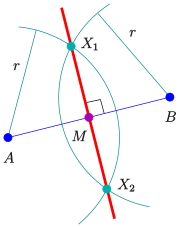

Pour savoir **comment colorer les régions à l'intérieur de ces limites**, pour chaque point, nous regardons **la couleur du voisin**. Lorsque $K = 1$, pour chaque point de données, $x$, dans notre **training data**, nous voulons trouver un autre point, $x′$, qui a **la plus petite distance** de $x$. **La distance la plus courte possible est toujours $0$**, ce qui signifie que **notre "plus proche voisin" est en fait le point d'origine (lui-même), $x=x′$**.

Pour colorer les zones à l'intérieur de ces limites, nous recherchons la catégorie correspondant à chaque $x$. Disons que nos choix sont **bleu** et **rouge**. Avec $K = 1$, nous colorons **les régions entourant les points rouges avec du rouge** et les **régions entourant le bleu avec du bleu**. Le résultat ressemblerait à ceci :

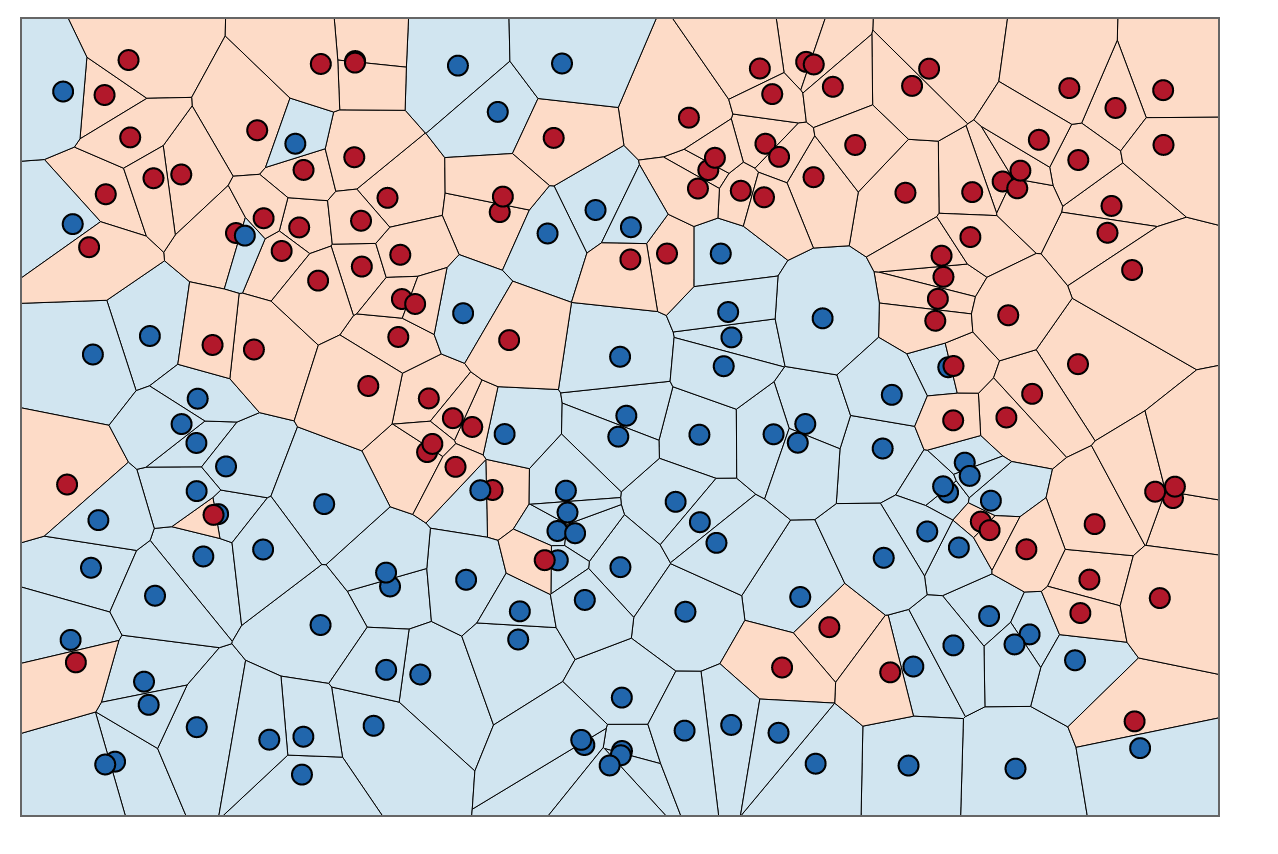

Remarquez qu'**il n'y a pas de points rouges dans les régions bleues** et vice versa. Cela nous indique qu'**il y a une erreur d'entraînement de 0**.

Notez que les **limites de décision** ne sont généralement tracées qu'**entre différentes catégories** (jetez toutes les limites bleu-bleu-rouge-rouge), de sorte que votre limite de décision pourrait ressembler davantage à ceci

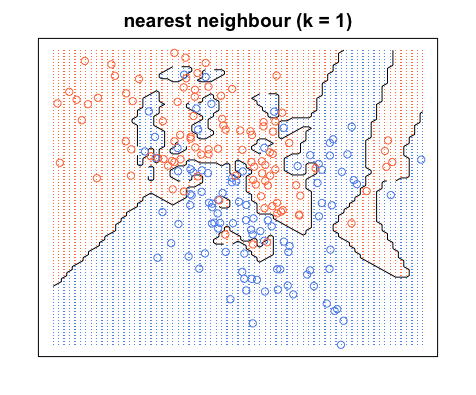

Encore une fois, **tous les points bleus sont dans les limites bleues** et **tous les points rouges sont dans les limites rouges** ; nous avons toujours une **test error** $= 0$. Par contre, si on augmente $K$ à $K=20$, on a le schéma ci-dessous. Notez qu'il y a des **points rouges dans les zones bleues** et des **points bleus dans les zones rouges**. Voici à quoi ressemble une **training error non nulle**.

Lorsque **K = 20**, nous **colorons les régions autour d'un point en fonction de la catégorie de ce point** (couleur dans ce cas) et de **la catégorie de 19 de ses voisins les plus proches**. Si la plupart des voisins sont bleus, mais que le point d'origine est rouge, le point d'origine est considéré comme une valeur aberrante et la région qui l'entoure est colorée en bleu. C'est pourquoi vous pouvez avoir autant de points de données rouges dans une zone bleue et vice versa.

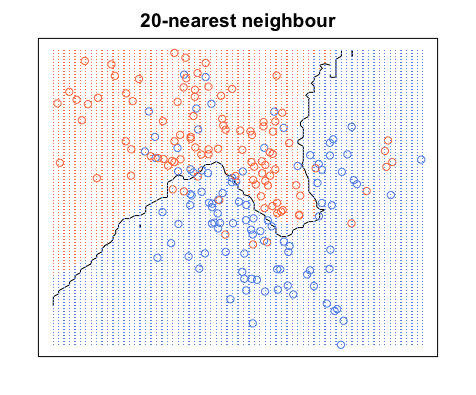

**reponse**:
    
Le modèle KNN avec K = 1 correspondrait exactement à l'ensemble d'apprentissage et l'erreur d'apprentissage serait donc nulle. Cela signifie que l'erreur de test doit être de 36 % pour que la moyenne des erreurs soit de 18 %. Comme la sélection du modèle est basée sur les performances sur l'ensemble de test, nous choisirons la régression logistique pour classer les nouvelles observations.

### Exercice 9

Ce problème a à voir avec les `odds`. 

(a) En moyenne, quelle fraction de personnes ayant une `odds` de 0,37 de faire défaut sur leur paiement par carte de crédit sera en fait défaillante ?

**reponse**:
    
$$\mbox{Odds} = \frac {P(X)}{1 - P(X)}$$

$$\frac {P(X)}{1 - P(X)} = 0.37$$

$$\frac {1 - P(X)}{P(X)} = \frac{1}{0.37}$$

$$\frac {1}{P(X)} - \frac {P(X)}{P(X)} = \frac{1}{0.37}$$

$$\frac {1}{P(X)} - 1 = \frac{1}{0.37}$$

$$\frac {1}{P(X)} = \frac{1}{0.37} + 1$$

$$\frac {1}{P(X)} = \frac{1}{0.37} + \frac{0.37}{0.37}$$

$$\frac {1}{P(X)} = \frac{1 + 0.37}{0.37}$$

$$\frac {1}{P(X)} = \frac{1.37}{0.37}$$

$$P(X) = \frac{0.37}{1.37}$$

$$P(X) = 0.27$$

27% des personnes ayant une odds de 0.37 seront en default

(b) Supposons qu'un individu ait 16 % de chances de ne pas payer avec sa carte de crédit. Quelles sont les `odds` qu'elle fasse défaut ?

**reponse**:
    
$$\mbox{Odds} = \frac {P(X)}{1 - P(X)}$$

avec $P(X) = 0.16$ alors:

$$\mbox{Odds} = \frac {0.16}{1 - 0.16} = 0.19$$

### Exercice 10

In [8]:
# 4.29 : Naive Bayes

Au sein de la classe $k$, les $p$ prédicteurs sont **indépendants** : pour $k = 1,...,K$ :

$$f_k(x) = f_{k1}(x_1) \space \mbox{x} \space f_{k2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{kp}(x_p)$$

In [10]:
# 4.30 : posterior probability

$$P(Y = k \space | \space X = x) = \frac{\pi_k \space \mbox{x} \space f_{k1}(x_1) \space \mbox{x} \space f_{k2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{kp}(x_p)}{\sum_{l = 1}^{K}\pi_l \space \mbox{x} \space f_{l1}(x_1) \space \mbox{x} \space f_{l2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{lp}(x_p)}$$

In [2]:
# 4.31

$$4.31$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right )$$

In [3]:
# 4.32

$$4.32$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \mbox{log} \left ( \frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k \mbox{exp}(-\frac{1}{2}(x - \mu_k)^T Σ^{-1} (x - \mu_k))}{\pi_K \mbox{exp}(-\frac{1}{2}(x - \mu_K)^T Σ^{-1} (x - \mu_K))}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(x - \mu_k)^T Σ^{-1}(x - \mu_k) + \frac{1}{2}(x - \mu_K)^T Σ^{-1}(x - \mu_K)$$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(\mu_k + \mu_K)^T Σ^{-1}(\mu_k - \mu_K) + x^T Σ^{-1}(\mu_k - \mu_K)$$

$$ = a_k + \sum_{j=1}^{p}b_{kj}x_j$$

$$ \mbox{avec} \space \space a_k = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(\mu_k + \mu_K)^T Σ^{-1}(\mu_k - \mu_K)$$

$$ \mbox{et avec} \space \space b_{kj} = j_{th} \space \space \mbox{composante de}\space \space Σ^{-1}(\mu_k - \mu_K)$$

In [4]:
# 4.33 (QDA)


$$\mbox{QDA}$$


$$4.33$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = a_k + \sum_{j=1}^{p}b_{kj}x_j + \sum_{j=1}^{p} \sum_{l=1}^{p}c_{kjl}x_j x_l$$

In [5]:
# 4.34

$$4.34$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \mbox{log} \left ( \frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k \prod_{j=1}^{p} f_{kj}(x_j)}{\pi_K \prod_{j=1}^{p} f_{Kj}(x_j)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K} \right ) + \sum_{j=1}^{p} \mbox{log}  \left (\frac{f_{kj}(x_j)}{f_{Kj}(x_j)} \right )$$

$$ = a_k + \sum_{j=1}^{p}g_{kj}(x_j)$$

$$ \mbox{avec} \space \space a_k =\mbox{log} \left ( \frac{\pi_k}{\pi_K} \right )$$

$$ \mbox{et avec} \space \space g_{kj}(x_j) = \mbox{log}  \left (\frac{f_{kj}(x_j)}{f_{Kj}(x_j)} \right )$$




In [6]:
# 4.35 Mulinomial Logistic Regression

$$ \mbox{Multinomial Logistic Regression}$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \beta_{k0} + \sum_{j=1}^{p}\beta_{kj}x_j$$

L'équation 4.32 a dérivé une expression pour $\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right )$  dans le cadre où $p > 1$, de sorte que la moyenne de la classe $k$, $\mu_k$, est un vecteur de dimension $p$, et la covariance partagée $Σ$ est une matrice `p × p`. Cependant, dans le cadre avec $p = 1$, (4.32) prend une forme plus simple, puisque les moyennes $\mu_1$,..., $\mu_K$ et la variance $\sigma^2$ sont des scalaires. Dans ce cadre plus simple, répétez le calcul de (4.32) et fournissez des expressions pour $a_k$ et $b_{kj}$ en termes de $\pi_k$, $\pi_K$, $\mu_k$, $\mu_K$ et $\sigma^2$.

### Exercice 11

Élaborez les formes détaillées de $a_k$, $b_{kj}$ et $b_{kjl}$ dans (4.33). Votre réponse devrait impliquer $\pi_k$, $\pi_K$, $\mu_k$, $\mu_K$, $Σ_k$ et $Σ_K$.

$$4.33$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = a_k + \sum_{j=1}^{p}b_{kj}x_j + \sum_{j=1}^{p} \sum_{l=1}^{p}c_{kjl}x_j x_l$$

### Exercice 12

Supposons que vous souhaitiez classer une observation $X ∈ R$ en `pommes` et `oranges`. Vous ajustez un modèle de **régression logistique** et trouvez que:

$$Pr(\hat Y = \mbox{orange} \space | \space X = x) = \frac{\mbox{exp}(\hat \beta_0 + \hat \beta_1x)}{ 1 + \mbox{exp}(\hat \beta_0 + \hat \beta_1x)}$$

Votre ami adapte un modèle de **régression logistique** aux mêmes données en utilisant la formulation **Softmax**:

$$ \mbox{Softmax} : \delta(x)_i = \frac {\mbox{exp}(x_i)}{\sum_{j=1}^{N}\mbox{exp}(x_j)}$$

$$P(Y = k \space | \space X = x)  = \frac{\mbox{exp}(\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp}x_p)}{\sum_{l=1}^{K}\mbox{exp}(\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp}x_p)}$$

et trouve que:

$$Pr(\hat Y = \mbox{orange} \space | \space X = x) = \frac{\mbox{exp}(\hat \alpha_{orange0} + \hat \alpha_{orange1}x)}{ \mbox{exp}(\hat \alpha_{orange0} + \hat \alpha_{orange1}x) + \mbox{exp}(\hat \alpha_{pomme0} + \hat \alpha_{pomme1}x)}$$



**odds** est la probabilité de succès/probabilité d'échec : $ \mbox{odds}= \frac{\mbox{P(succès)}}{\mbox{P(echec)}}$

**log(odds)** est le logarithme de la probabilité de succès / probabilité d'echec : $\mbox{log(odds)} = \mbox{log}\left (\frac{\mbox{P(succès)}}{\mbox{P(echec)}}\right ) = \mbox{log}\left (\frac{\mbox{P(succès)}}{\mbox{1 - P(succes)}}\right )$

$$\mbox{log}_{odds}(A) = \mbox{log} \left ( \frac{\mbox{P(A)}}{\mbox{1 - P(A)}} \right )$$

$$e^{log_{odds}} = \mbox{odds ratio}$$

(a) Quelle est **log(odds)** de `orange` par rapport à `pomme` dans votre modèle ?

**reponse**:
    
$$p = \frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}$$

$$1 - p = 1 - \frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}} = \frac{1}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}$$

### $$\frac {p}{1 -p} = \frac{\frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}}{\frac{1}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}} = e^{\hat \beta_0 + \hat \beta_1 x}$$

$$ \mbox{log} \left( \frac {p}{1 -p} \right ) = \hat \beta_0 + \hat \beta_1 x$$

(b) Quelle est **log(odds)** de `orange` par rapport à `pomme` dans le modèle de votre ami ?

**reponse**:
    
### $$p = \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

### $$1 - p = 1 -  \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}} = \frac{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

### $$\frac {p}{1 - p} = \frac{\frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}} {\frac{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}} = \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

$$ \mbox{log} \left( \frac {p}{1 -p} \right ) = \hat \beta_{orange0} + \hat \beta_{orange1} x - (\hat \beta_{pomme0} + \hat \beta_{pomme1} x) = \hat \beta_{orange0} + \hat \beta_{orange1} x - \hat \beta_{pomme0} - \hat \beta_{pomme1} x$$

(c) Supposons que dans votre modèle, $\hat \beta_0 = 2$ et $\hat \beta_1 = −1$. Quelles sont les estimations de coefficient dans le modèle de votre ami ? Soyez aussi spécifique que possible

(d) Supposons maintenant que vous et votre ami ajustiez les deux mêmes modèles sur un ensemble de données différent. Votre ami obtient les estimations de coefficient :</br>

$\hat \alpha_{orange0} = 1.2$</br>
$\hat \alpha_{orange1} = −2$</br>
$\hat \alpha_{pomme0} = 3$</br>
$\hat \alpha_{pomme1} = 0.6$

Quelles sont les estimations de coefficient dans votre modèle ? 

(e) Enfin, supposons que vous appliquiez les deux modèles de (d) à un ensemble de données avec 2 000 observations de test. Dans quelle fraction de temps pensez-vous que les étiquettes de classe prédites de votre modèle concordent avec celles du modèle de votre ami ? Expliquez votre réponse

### Exercice 13

Il convient de répondre à cette question à l'aide de l'ensemble de données hebdomadaire, qui fait partie du package `ISLR2`. Ces données sont de nature similaire aux données Smarket du laboratoire de ce chapitre, sauf qu'elles contiennent 1 089 déclarations hebdomadaires pendant 21 ans, du début de 1990 à la fin de 2010.

(a) Produire des résumés numériques et graphiques des données hebdomadaires. Est-ce qu'il semble y avoir des modèles?

In [4]:
weekly = pd.read_csv('weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [5]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


il y a de **fortes correlations** entre `Year`/`Volume`</br>
les plus **fortes correlations** pour `Today` sont avec `Lag1` et `Lag3`

In [6]:
today = weekly['Today']
today_perc = (today + 100) / 100
print(min(today), max(today))
print(min(today_perc), max(today))

-18.195 12.026
0.81805 12.026


Text(0, 0.5, "Values's variations  of today's percentage")

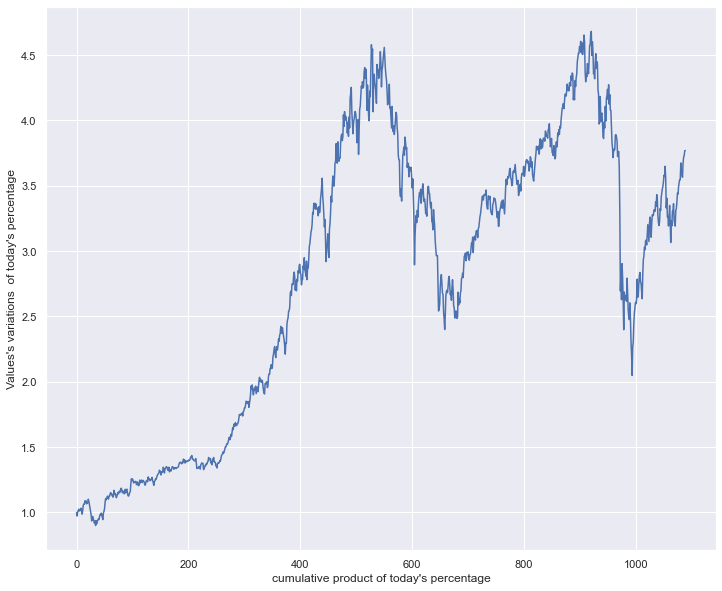

In [7]:
today_perc.cumprod().plot()
plt.xlabel("cumulative product of today's percentage")
plt.ylabel("Values's variations  of today's percentage")

Text(0, 0.5, 'Volume')

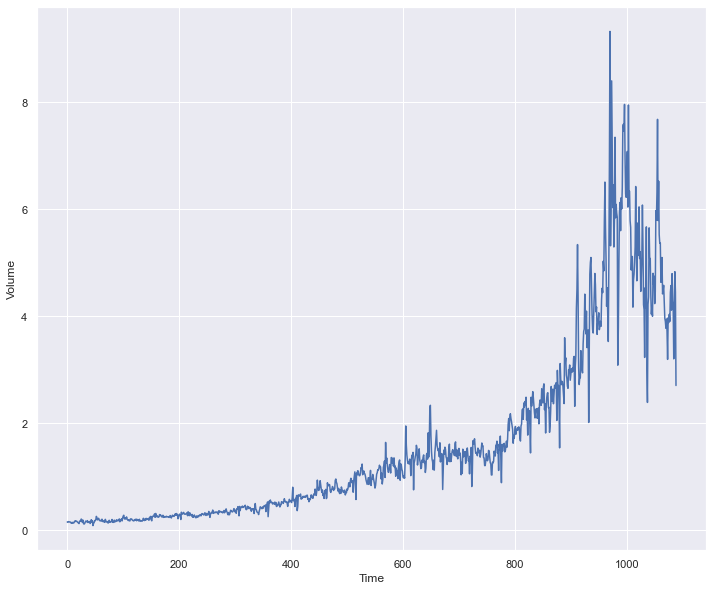

In [8]:
weekly['Volume'].plot()
plt.xlabel("Time")
plt.ylabel("Volume")

<AxesSubplot:xlabel='Direction', ylabel='Lag3'>

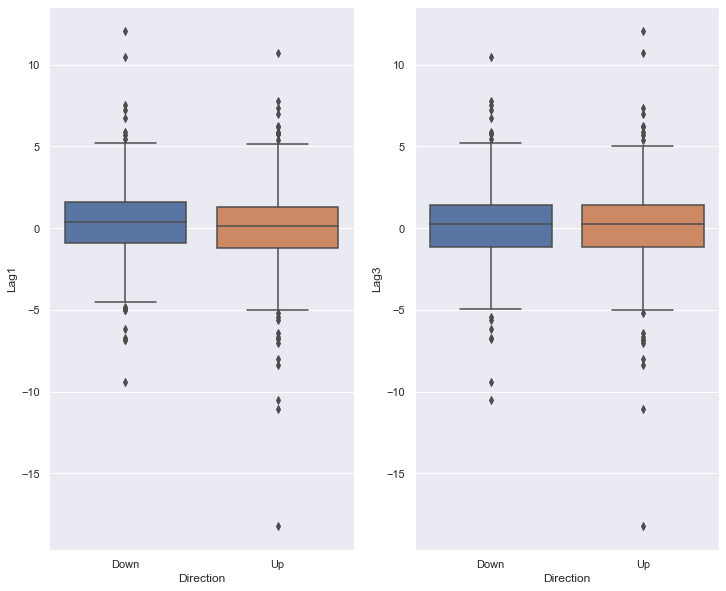

In [32]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(x='Direction', y='Lag1', data=weekly, ax = ax[0])
sns.boxplot(x='Direction', y='Lag3', data=weekly, ax = ax[1])

In [9]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

(b) Utilisez l'ensemble de données complet pour effectuer une régression logistique avec la direction comme réponse et les cinq variables de décalage plus le volume comme prédicteurs. Utilisez la fonction de résumé pour imprimer les résultats. Certains des prédicteurs semblent-ils statistiquement significatifs ? Si oui, lesquels?


In [10]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                0.006580
Time:                        08:04:00   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

`Lag2` est statistiquement significatif donc on peut rejeter l'hypothèse nulle que $\hat \beta_{Lag2} = 0$

In [11]:
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                0.003866
Time:                        08:04:04   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

(c) Calculez la matrice de confusion et la fraction globale des prédictions correctes. Expliquez ce que la matrice de confusion vous dit sur les types d'erreurs commises par la régression logistique.

In [17]:
min(results.predict(weekly)), max(results.predict(weekly))

(0.2833828122587036, 0.7250898070644308)

In [24]:
preds = np.where(results.predict(weekly) > 0.5, 1, 0)
cm = confusion_matrix(weekly['Direction'], preds)
cm

array([[ 33, 451],
       [ 26, 579]], dtype=int64)

<AxesSubplot:>

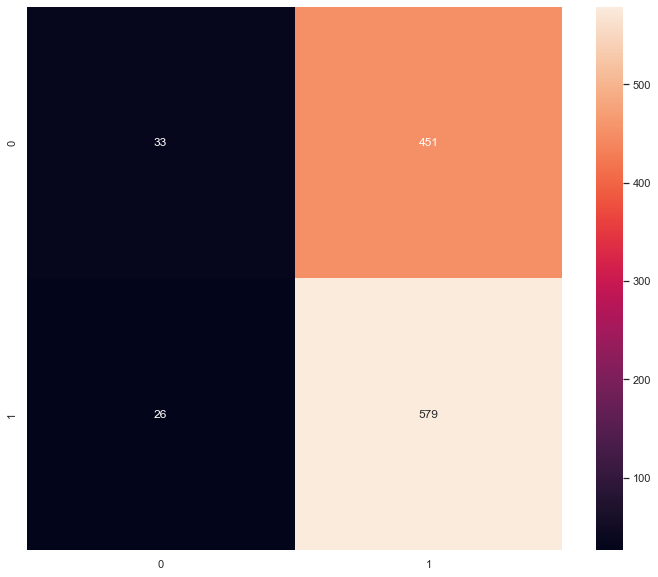

In [27]:
sns.heatmap(cm, annot=True, fmt="d")

In [49]:
total = 33 + 451 + 26 + 579
accuracy = (33 + 579) / total
down_true = (451 + 33)
down_pred = (33)
up_true = (26 + 579)
up_pred = 579
print(f'les predictions sont correctes a {round(accuracy*100, 2)}%')
print(f'les predictions "Direction == Down" sont correctes a {round((down_pred / down_true)*100, 2)}%')
print(f'les predictions "Direction == Up" sont correctes a {round((up_pred / up_true)*100, 2)}%')
print(f'total de "Direction == Up" : {round((up_true / total)*100, 2)}%')
print(f'difference entre accuracy du model et total de "Direction == Up" : {round((accuracy - (up_true / total))*100, 2)}%')

les predictions sont correctes a 56.2%
les predictions "Direction == Down" sont correctes a 6.82%
les predictions "Direction == Up" sont correctes a 95.7%
total de "Direction == Up" : 55.56%
difference entre accuracy du model et total de "Direction == Up" : 0.64%


56,2 % des predictions sont correctes, mais ce n'est que légèrement supérieur au total de 55,6 % de 'Direction == Up'.

(d) Ajustez maintenant le modèle de régression logistique en utilisant une période de données d'entraînement de 1990 à 2008, avec Lag2 comme seul prédicteur. Calculez la matrice de confusion et la fraction globale des prédictions correctes pour les données retenues (c'est-à-dire les données de 2009 et 2010).

In [92]:
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [95]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                      penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                      verbose=0, warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [97]:
cm = confusion_matrix(y_test, lr.predict(X_test))
cm

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

<AxesSubplot:>

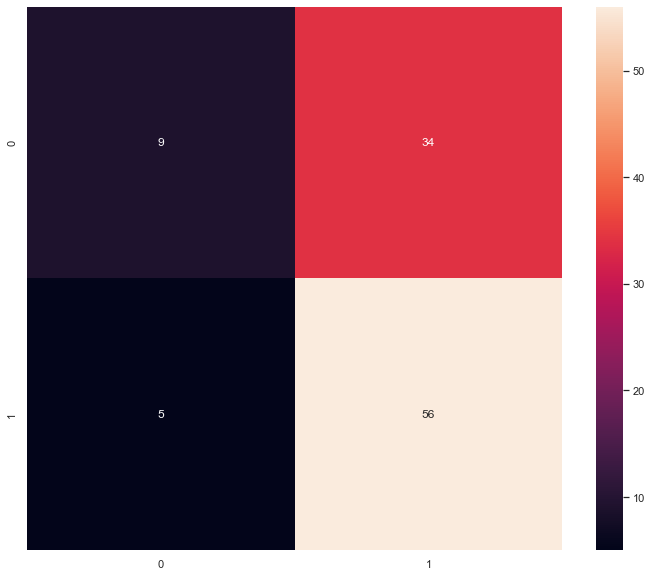

In [98]:
sns.heatmap(cm, annot=True, fmt="d")

In [99]:
total = 9 + 34 + 5 + 56
accuracy = (9 + 56) / total
down_true = (9 + 34)
down_pred = (9)
up_true = (5 + 56)
up_pred = 56
print(f'les predictions sont correctes a {round(accuracy*100, 2)}%')
print(f'les predictions "Direction == Down" sont correctes a {round((down_pred / down_true)*100, 2)}%')
print(f'les predictions "Direction == Up" sont correctes a {round((up_pred / up_true)*100, 2)}%')
print(f'total de "Direction == Up" : {round((up_true / total)*100, 2)}%')
print(f'difference entre accuracy du model et total de "Direction == Up" : {round((accuracy - (up_true / total))*100, 2)}%')

les predictions sont correctes a 62.5%
les predictions "Direction == Down" sont correctes a 20.93%
les predictions "Direction == Up" sont correctes a 91.8%
total de "Direction == Up" : 58.65%
difference entre accuracy du model et total de "Direction == Up" : 3.85%


(e) Répétez (d) en utilisant **LDA**.

In [100]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

Meme resultats pour **Linear Discriminant Analysis** que **Logistic Regression**

(f) Répétez (d) en utilisant **QDA**.

In [195]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.001) # si reg_param = 0 : on obtient une 'Error : Division by zero'(power, log)
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

C:\Users\david\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[ 0, 43],
       [ 0, 61]], dtype=int64)

In [196]:
qda.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(g) Répétez (d) en utilisant **KNN** avec $K = 1$.

In [112]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[22, 21],
       [31, 30]], dtype=int64)

(h) Répétez (d) en utilisant **Naive Bayes**.

In [128]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(abs(X_train), y_train)
confusion_matrix(y_test, clf.predict(abs(X_test)))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

Naive Bayes Multinomial ne fonctionne pas avec des valeurs negatives

In [149]:
bool_date = weekly['Year'] < 2009
log2_train = weekly[bool_date]['Lag2'].values.reshape((len(X_train), 1))
log2_test = weekly[~bool_date]['Lag2'].values.reshape((len(X_test), 1))

In [173]:
len(log2_test_scale), len(log2_train_scale)

(104, 985)

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(log2_train, y_train)
log2_train_scale, log2_test_scale = scaler.transform(log2_train), scaler.transform(log2_test);

In [187]:
ones_train = np.ones(len(X_train)).reshape(len(X_train), 1)
ones_test = np.ones(len(X_test)).reshape(len(X_test), 1)

X_train_scale = np.column_stack((ones_train, log2_train_scale))
X_test_scale = np.column_stack((ones_test, log2_test_scale))

In [189]:
clf.fit(X_train_scale, y_train)
confusion_matrix(y_test, clf.predict(X_test_scale))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

In [191]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_scale, y_train)
confusion_matrix(y_test, clf.predict(X_test_scale))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

(i) Laquelle de ces méthodes semble fournir les meilleurs résultats sur ces données ?

**Logistic Regression** et **Linear Discriminant Analysis** ont les meilleurs score (accuracy)

(j) Expérimentez avec différentes combinaisons de prédicteurs, y compris les transformations et interactions possibles, pour chacune des méthodes. Indiquez les variables, la méthode et la matrice de confusion associée qui semblent fournir les meilleurs résultats sur les données retenues. Notez que vous devez également expérimenter avec des valeurs pour K dans le classificateur KNN

In [192]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]], dtype=int64)

In [197]:
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               8.318e-06
Time:                        10:27:08   Log-Likelihood:                -748.09
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9112
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2256      0.065      3.475      0.001       0.098       0.353
np.power(Lag5, 2)    -0.0004      0.004     -0.112      0.911      -0.008       0.007
=====================================================================================
"""

In [198]:
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               0.0001136
Time:                        10:27:45   Log-Likelihood:                -748.02
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.6801
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2359      0.068      3.448      0.001       0.102       0.370
np.power(Volume, 2)    -0.0024      0.006     -0.413      0.680      -0.014       0.009
=======================================================================================
"""

In [199]:
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               0.0006650
Time:                        10:28:06   Log-Likelihood:                -747.60
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.8025
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2631      0.084      3.134      0.002       0.099       0.428
Volume         -0.0235      0.036     -0.649      0.516      -0.095       0.048
Lag3           -0.0188      0.039     -0.482      0.630      -0.095       0.058
Volume:Lag3    -0.0007      0.011     -0.067      0.946      -0.022       0.020
===============================================================================
"""

### Exercice 14

Dans ce problème, vous allez développer un modèle pour prédire si une voiture donnée obtient une consommation d'essence élevée ou faible en fonction du dataset `Auto`.

(a) Créez une variable binaire, `mpg01`, qui contient un **1** si `mpg` contient une **valeur supérieure à sa médiane**, et un **0** si `mpg` contient une **valeur inférieure à sa médiane**. Vous pouvez calculer la médiane à l'aide de la fonction `median()`. Notez que vous pouvez trouver utile d'utiliser la fonction `data.frame()` pour créer un ensemble de données unique contenant à la fois `mpg01` et les `autres variables Auto`.


In [200]:
auto = pd.read_csv('auto.csv')

In [214]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int64
dtype: object

In [213]:
auto['mpg01'] = np.array(np.where(auto['mpg'] > auto['mpg'].median(), 1, 0), dtype='int64')

(b) Explorer graphiquement les données afin d'étudier l'association entre `mpg01` et les `autres caractéristiques`. Laquelle des autres fonctionnalités semble la plus susceptible d'être utile pour prédire `mpg01` ? Les **scatterplots** et les **boxplots** peuvent être des outils utiles pour répondre à cette question. Décrivez vos découvertes.

In [202]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


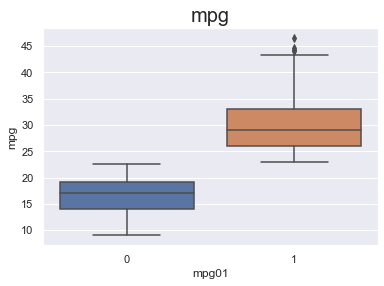

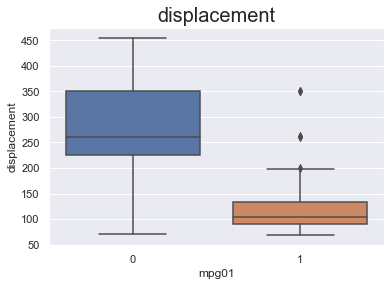

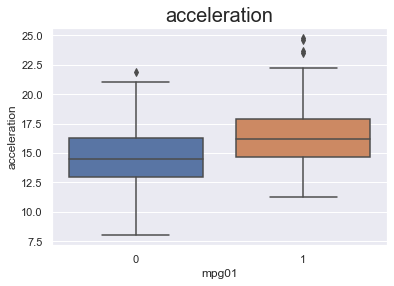

In [247]:
for col in auto.select_dtypes('float'):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=auto['mpg01'], y =auto[col])
    plt.title(f'{col}', fontsize=20)

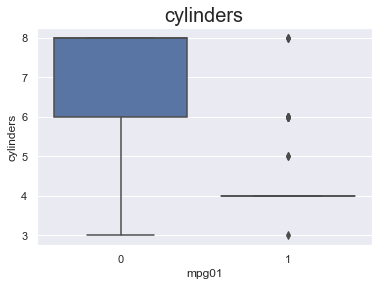

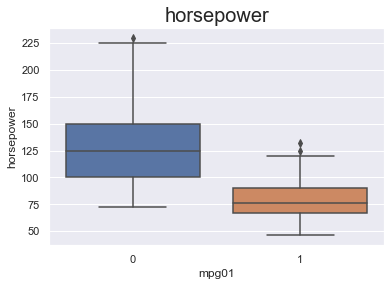

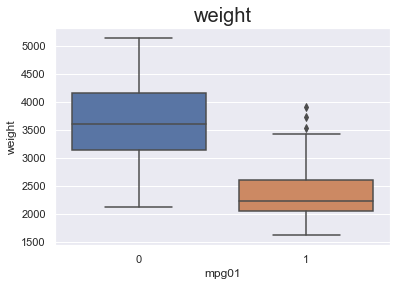

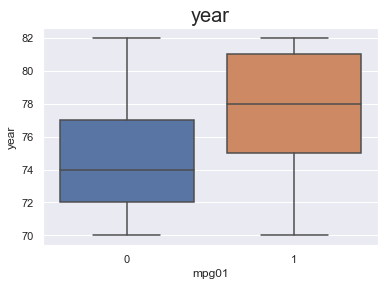

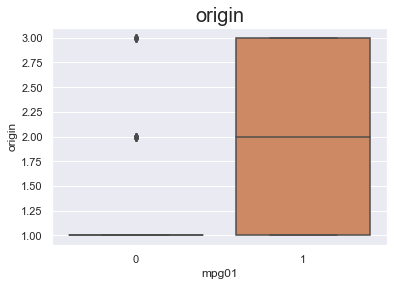

<Figure size 432x288 with 0 Axes>

In [246]:
for col in auto.select_dtypes('int64'):
    plt.figure(figsize=(6,4))
    if col == 'mpg01':
        break
    sns.boxplot(x=auto['mpg01'], y =auto[col])
    plt.title(f'{col}', fontsize=20)

<Figure size 864x720 with 0 Axes>

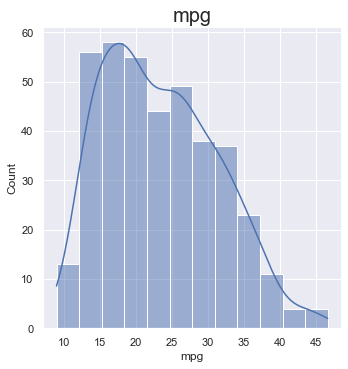

<Figure size 864x720 with 0 Axes>

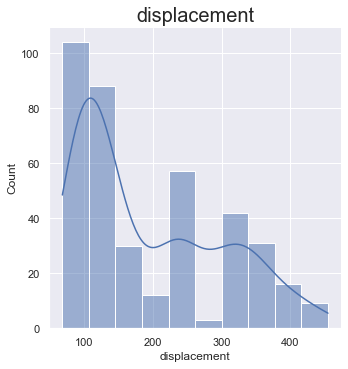

<Figure size 864x720 with 0 Axes>

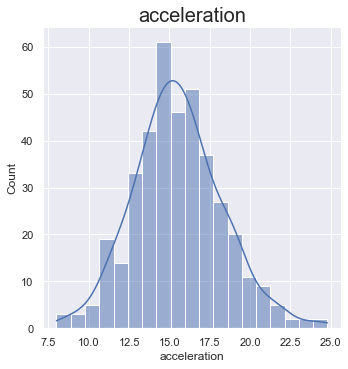

In [248]:
for col in auto.select_dtypes('float'):
    plt.figure()
    sns.displot(auto[col], kde=True)
    plt.title(f'{col}', fontsize=20)

<Figure size 864x720 with 0 Axes>

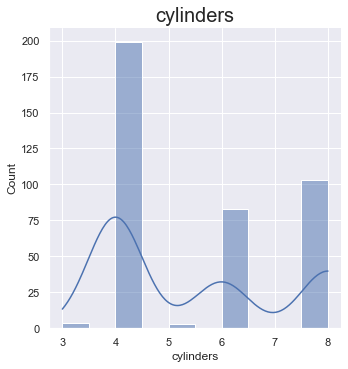

<Figure size 864x720 with 0 Axes>

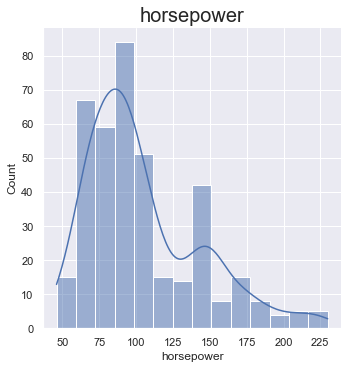

<Figure size 864x720 with 0 Axes>

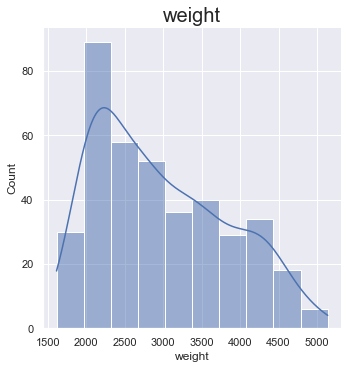

<Figure size 864x720 with 0 Axes>

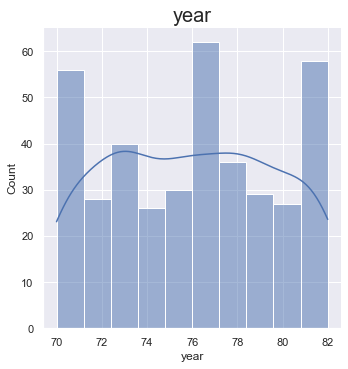

<Figure size 864x720 with 0 Axes>

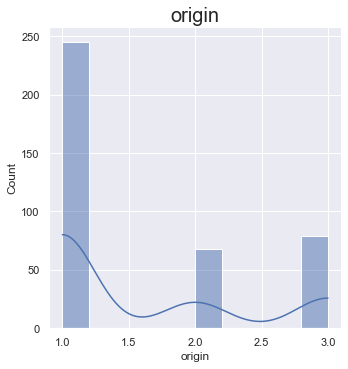

<Figure size 864x720 with 0 Axes>

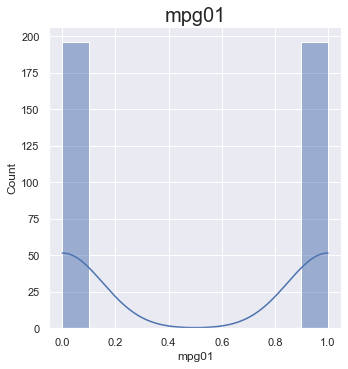

In [249]:
for col in auto.select_dtypes('int64'):
    plt.figure()
    sns.displot(auto[col], kde=True)
    plt.title(f'{col}', fontsize=20)

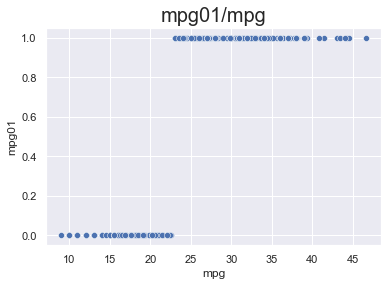

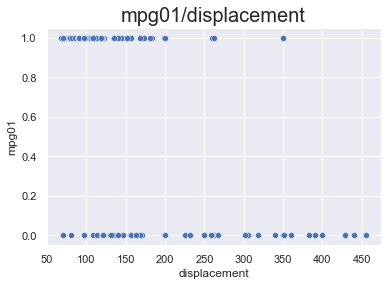

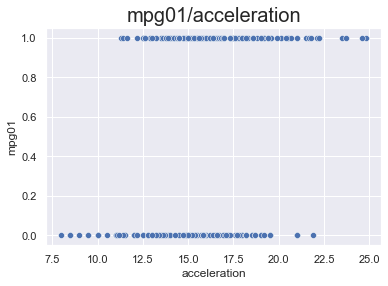

In [254]:
for col in auto.select_dtypes('float'):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=auto[col], y =auto['mpg01'])
    plt.title(f'mpg01/{col}', fontsize=20)

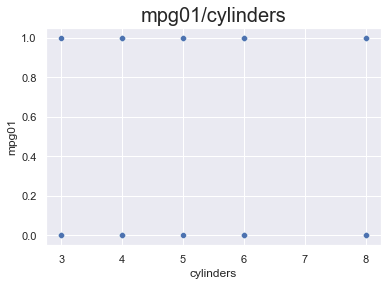

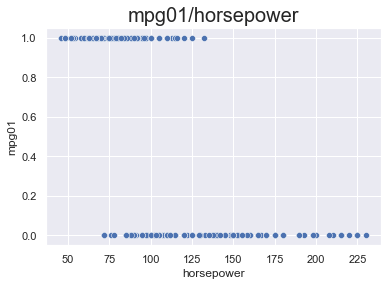

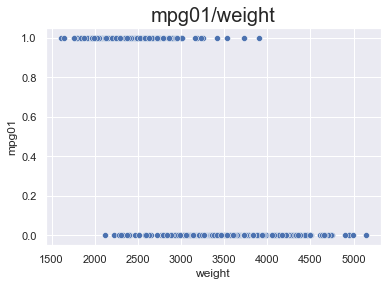

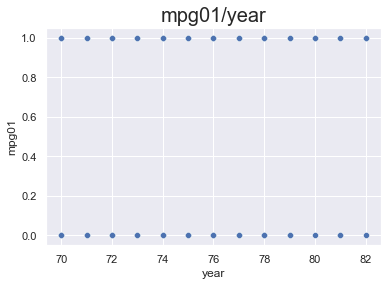

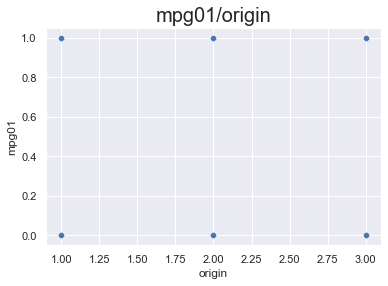

In [251]:
for col in auto.select_dtypes('int64'):
    if col == 'mpg01':
        break
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=auto[col], y =auto['mpg01'])
    plt.title(f'mpg01/{col}', fontsize=20)

(c) Divisez les données en un ensemble d'apprentissage et un ensemble de test.

In [256]:
from sklearn.model_selection import train_test_split

In [262]:
X = auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [259]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [268]:
scale = MinMaxScaler()
scale.fit(X_train, y_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [269]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train_scale, y_train)
accuracy_score(y_test, lr.predict(X_test_scale))

0.9873417721518988

(d) Effectuez **LDA** sur les données d'apprentissage afin de prédire `mpg01` en utilisant les variables qui semblaient les plus associées à `mpg01` en (b). Quelle est l'erreur de test du modèle obtenu ?

In [281]:
X = auto[['cylinders', 'displacement']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [282]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9240506329113924

In [271]:
# cylinders / displacement / weight / horsepower / origin / year (par ordre decroissant)

In [283]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9493670886075949

In [284]:
X = auto[['cylinders', 'weight']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9493670886075949

In [285]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9081632653061225

In [294]:
# .difference(['name']) : supprime la colonne 'name' de auto.columns
# https://datascience.stackexchange.com/questions/46434/dataframe-columns-difference-use
auto.columns[1:-1].difference(['name'])

Index(['acceleration', 'cylinders', 'displacement', 'horsepower', 'origin',
       'weight', 'year'],
      dtype='object')

In [295]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9489795918367347

(e) Effectuez **QDA** sur les données de formation afin de prédire `mpg01` en utilisant les variables qui semblaient les plus associées à `mpg01` en (b). Quelle est l'erreur de test du modèle obtenu ?

In [296]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9489795918367347

(f) Effectuez une **régression logistique** sur les données d'apprentissage afin de prédire `mpg01` en utilisant les variables qui semblaient les plus associées à `mpg01` en (b). Quelle est l'erreur de test du modèle obtenu ?


In [297]:
# C=.01 : regularization 
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.9897959183673469

(g) Effectuez un **NaiveBayes** sur les données d'apprentissage afin de prédire `mpg01` en utilisant les variables qui semblaient les plus associées à `mpg01` en (b). Quelle est l'erreur de test du modèle obtenu ?

In [307]:
nb = GaussianNB()
nb.fit(X_train, y_train)
accuracy_score(y_test, nb.predict(X_test))

0.9285714285714286

(h) Effectuez **KNN** sur les données d'apprentissage, avec plusieurs valeurs de **K**, afin de prédire `mpg01`. Utilisez uniquement les variables qui semblaient les plus associées à `mpg01` en (b). Quelles erreurs de test obtenez-vous ? Quelle valeur de $K$ semble être la plus performante sur cet ensemble de données ?

In [300]:
s = list()
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))
    s.append((k, accuracy))

In [304]:
s[10:35]

[(11, 0.9081632653061225),
 (12, 0.9081632653061225),
 (13, 0.9081632653061225),
 (14, 0.9081632653061225),
 (15, 0.8979591836734694),
 (16, 0.8979591836734694),
 (17, 0.8877551020408163),
 (18, 0.9183673469387755),
 (19, 0.9183673469387755),
 (20, 0.9183673469387755),
 (21, 0.9081632653061225),
 (22, 0.9081632653061225),
 (23, 0.9081632653061225),
 (24, 0.9183673469387755),
 (25, 0.9081632653061225),
 (26, 0.9183673469387755),
 (27, 0.9183673469387755),
 (28, 0.9183673469387755),
 (29, 0.9183673469387755),
 (30, 0.9183673469387755),
 (31, 0.9183673469387755),
 (32, 0.9183673469387755),
 (33, 0.9081632653061225),
 (34, 0.9081632653061225),
 (35, 0.8979591836734694)]

On voit que les meilleurs valeurs pour $k$ sont entre **18 et 32**

### Exercice 15

Ce problème implique l'écriture de fonctions.

(a) Écrivez une fonction, `Power()`, qui affiche le résultat de l'élévation de 2 à la puissance 3. En d'autres termes, votre fonction doit calculer $2^3$ et imprimer les résultats.

**Indice** : rappelez-vous que $x^a$ élève $x$ à la **puissance a**. Utilisez la fonction `print()` pour afficher le résultat.

In [314]:
power = lambda x: x**3
power(2)

8

(b) Créez une nouvelle fonction, `Power2()`, qui vous permet de transmettre deux nombres quelconques, $x$ et $a$, et affiche la valeur de $x^a$. Vous pouvez le faire en commençant votre fonction par la ligne

> Puissance2(3, 8)



In [317]:
power2 = lambda x, a: x ** a
print(power2(3, 8))

6561


(c) En utilisant la fonction `Power2()` que vous venez d'écrire, calculez $10^3$, $8^{17}$ et $131^3$.

In [315]:
print(power2(10,3))
print(power2(8,17))
print(power2(131,3))

1000
2251799813685248
2248091


(d) Créez maintenant une nouvelle fonction, `Power3()`, qui renvoie en fait le résultat $x^a$ sous la forme d'un **objet R**, plutôt que de simplement l'afficher à l'écran. C'est-à-dire que si vous stockez la valeur $x^a$ dans un objet appelé `result` au sein de votre fonction, alors vous pouvez simplement `return()` qui retourne ce resultat, en utilisant la ligne suivante : `return (result)`</br>


In [316]:
def power3(x, a):
    result = x ** a
    return result

power3(2,2)

4

(e) Maintenant, en utilisant la fonction `Power3()`, créez un tracé de $f(x) = x^2$. L'**axe des** $x$ doit afficher une plage d'entiers de **1 à 10** et l'**axe des y** doit afficher $x^2$. Étiquetez les axes de manière appropriée et utilisez un titre approprié pour la figure. Envisagez d'afficher l'axe des x, l'axe des y ou les deux sur l'échelle logarithmique. Vous pouvez le faire en utilisant **`log = "x"`**, **`log = "y"`** ou **`log = "xy"`** comme arguments de la fonction `plot()`.

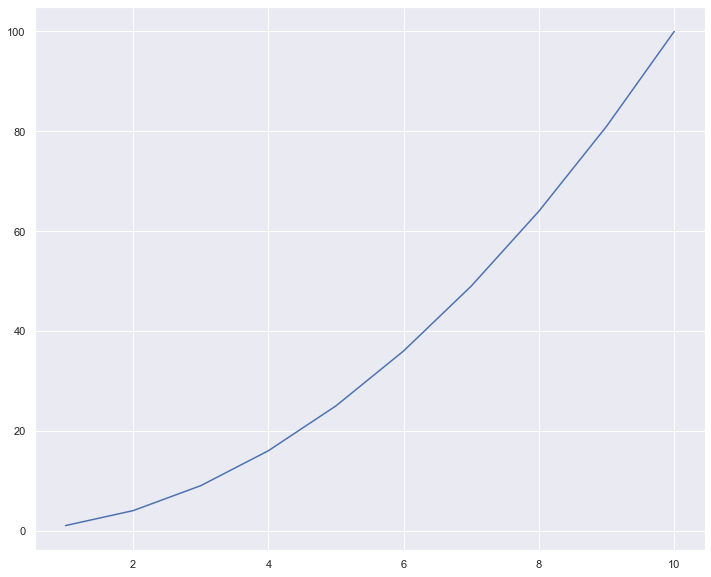

In [321]:
n = 11
plt.plot(range(1,n), [power2(x, 2) for x in range(1,n)]);

(f) Créez une fonction, `PlotPower()`, qui vous permet de créer un graphique de $x$ par rapport à $x^a$ pour un $a$ fixe et pour une plage de valeurs de $x$. Par exemple, si vous appelez `PlotPower(1:10, 3)` alors un tracé doit être créé avec un axe des $x$ prenant les valeurs $1, 2,..., 10$, et un axe des $y$ prenant les valeurs $1^3, 2^3,..., 10^3$

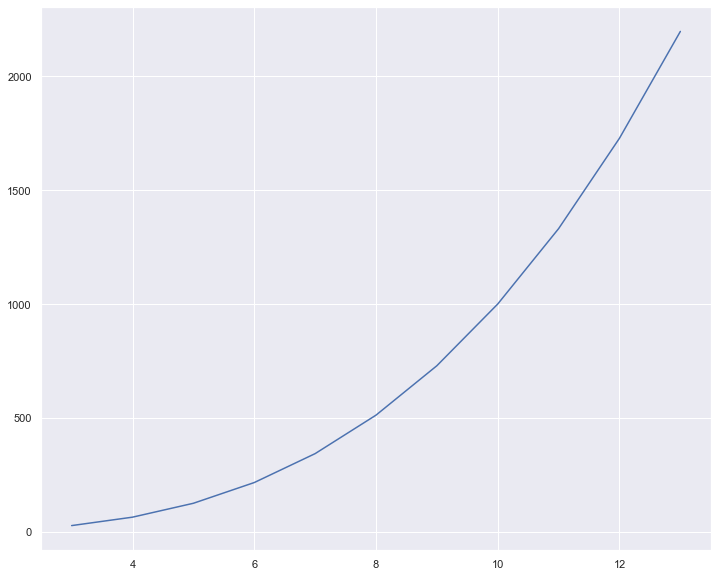

In [326]:
def plot_power(rng, p):
    plt.plot(rng, [power2(x, p) for x in rng])
    
plot_power(range(3,14), 3)

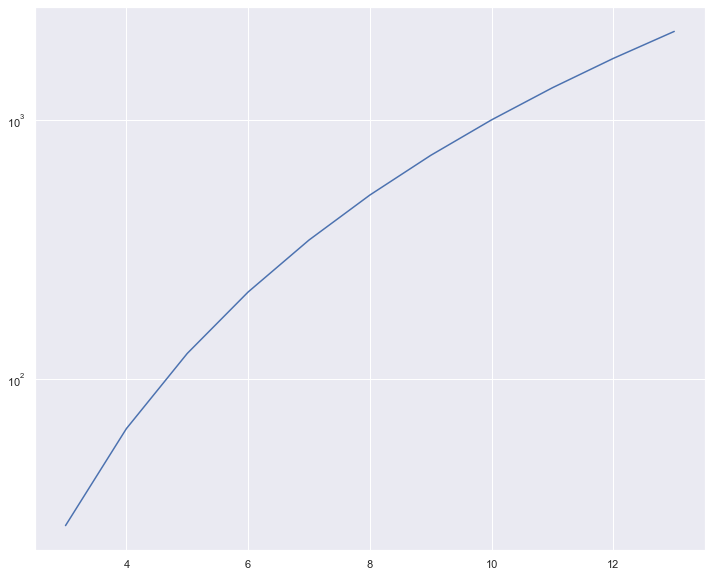

In [331]:
plot_power(range(3,14), 3)
plt.yscale('log')
# plt.gca().invert_yaxis()

### Exercice 16

À l'aide du dataset de `Boston`, ajustez les modèles de classification afin de prédire si un secteur de recensement donné(`census tract`) a un taux de criminalité(`crime rate`) **supérieur** ou **inférieur à la médiane**. Explorez les modèles de **régression logistique**, **LDA**, **NaiveBayes** et **KNN** à l'aide de divers sous-ensembles de prédicteurs. Décrivez vos découvertes.

Astuce : Vous devrez créer vous-même la variable de réponse, en utilisant les variables contenues dans l'ensemble de données de `Boston`.

0.45454545454545453